<a href="https://colab.research.google.com/github/joaonfcastro/Trading_Esportivo_With_Data_Analysis/blob/main/Data_Science_Trading_Esportivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Analise de Dados Aplicada ao Trading Esportivo**

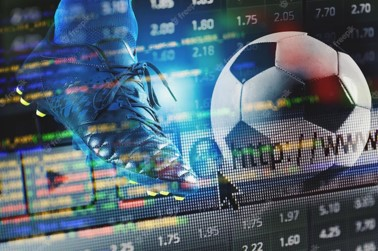

O **Trading Esportivo** é um tipo de mercado especulativo voltado para a Bolsa esportiva de apostas. Neste mercado é possível realizar operações a favor ou contra a probabilidade de um possivel acontecimento em uma partida esportiva, respectivamente conhecidos como posicoes de "back" ou "lay".

Este projeto visa aplicar ciencia de dados ao Trading Esportivo, um dos principais campos da **probabilidade e estatítica**. O objetivo é realizar um pipeline que possibilite a aplicação de **Modelos Supervisionados de Machine Learnig** para predição de resultados.

### **Loading Packages**

Vamos carregar o dataset com as estatisticas dos ultimos 10 anos das 7 principais ligas nacionais europeias. Os dados foram extraídos do portal https://www.football-data.co.uk/ e posteriomente passados em um processo de data prep para ajustes e seleção das principais features.

Ligas:
* Premier League
* Budesliga
* La Liga
* Calcio
* Ligue 1
* Eredivise
* Liga de Portugal

In [27]:
#Packages Prepare and Exploratory Data
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import files
import warnings
import datetime as dt
import plotly.express as px
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)
warnings.filterwarnings('ignore', category=FutureWarning)
from google.colab import drive
drive.mount('/content/drive')


#Packages Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

Mounted at /content/drive


### **Loading Dataset**

In [28]:
#Load dataset
df = pd.read_excel('/df_football_hist_10_years.xlsx')

In [29]:
#Show dataset
df.head()

Unnamed: 0  Match          League Season       Date     Home         Away  \
0           0      1          Calcio  23-24 2023-09-03    Lecce  Salernitana   
1           1      2          LaLiga  23-24 2023-09-03  Osasuna    Barcelona   
2           2      3   Liga Portugal  23-24 2023-09-03  Estoril     Boavista   
3           3      4   Liga Portugal  23-24 2023-09-03   Chaves   Moreirense   
4           4      5  Premier League  23-24 2023-09-03  Arsenal   Man United   

   HomeGoals  AwayGoals Result  HomeShootsTarget  AwayShootsTarget  HomeFouls  \
0          2          0      H                 6                 4         17   
1          1          2      A                 3                 4          6   
2          1          2      A                 4                 8         21   
3          1          2      A                 3                 2         14   
4          3          1      H                 5                 2          8   

   AwayFouls  HomeCorners  AwayCorners  HomeYellow  AwayYellow  HomeRed  \
0         15            6            5           3           3        0   
1         16            8            5           1           3        1   
2         12           10            5           3           1        0   
3         21            3            4           3           4        0   
4          7           12            3           2           3        0   

   AwayRed  HomeOdds  DrawOdds  AwayOdds  
0        0      2.00      3.30      4.00  
1        0      5.25      4.00      1.65  
2        0      2.40      3.25      2.90  
3        0      2.40      3.25      2.88  
4        0      1.75      3.80      4.50

### **Exploratory Data Analysis**

In [30]:
df.shape

(20158, 23)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20158 entries, 0 to 20157
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        20158 non-null  int64         
 1   Match             20158 non-null  int64         
 2   League            20158 non-null  object        
 3   Season            20158 non-null  object        
 4   Date              20158 non-null  datetime64[ns]
 5   Home              20158 non-null  object        
 6   Away              20158 non-null  object        
 7   HomeGoals         20158 non-null  int64         
 8   AwayGoals         20158 non-null  int64         
 9   Result            20158 non-null  object        
 10  HomeShootsTarget  20158 non-null  int64         
 11  AwayShootsTarget  20158 non-null  int64         
 12  HomeFouls         20158 non-null  int64         
 13  AwayFouls         20158 non-null  int64         
 14  HomeCorners       2015

In [32]:
df.isnull().sum()

Unnamed: 0          0
Match               0
League              0
Season              0
Date                0
Home                0
Away                0
HomeGoals           0
AwayGoals           0
Result              0
HomeShootsTarget    0
AwayShootsTarget    0
HomeFouls           0
AwayFouls           0
HomeCorners         0
AwayCorners         0
HomeYellow          0
AwayYellow          0
HomeRed             0
AwayRed             0
HomeOdds            0
DrawOdds            0
AwayOdds            0
dtype: int64

In [33]:
df = df.drop(['Unnamed: 0'], axis=1)

### **Feature Engineering**

#### **Create Columns Result per Match Individual**

In [34]:
#Create Columns Result per Match Individual
df['HomeResult'] = np.where(df.Result == 'H', 1, 0)
df['DrawResult'] = np.where(df.Result == 'D', 1, 0)
df['AwayResult'] = np.where(df.Result == 'A', 1, 0)

df.head()

Match          League Season       Date     Home         Away  HomeGoals  \
0      1          Calcio  23-24 2023-09-03    Lecce  Salernitana          2   
1      2          LaLiga  23-24 2023-09-03  Osasuna    Barcelona          1   
2      3   Liga Portugal  23-24 2023-09-03  Estoril     Boavista          1   
3      4   Liga Portugal  23-24 2023-09-03   Chaves   Moreirense          1   
4      5  Premier League  23-24 2023-09-03  Arsenal   Man United          3   

   AwayGoals Result  HomeShootsTarget  AwayShootsTarget  HomeFouls  AwayFouls  \
0          0      H                 6                 4         17         15   
1          2      A                 3                 4          6         16   
2          2      A                 4                 8         21         12   
3          2      A                 3                 2         14         21   
4          1      H                 5                 2          8          7   

   HomeCorners  AwayCorners  HomeYellow  AwayYellow  HomeRed  AwayRed  \
0            6            5           3           3        0        0   
1            8            5           1           3        1        0   
2           10            5           3           1        0        0   
3            3            4           3           4        0        0   
4           12            3           2           3        0        0   

   HomeOdds  DrawOdds  AwayOdds  HomeResult  DrawResult  AwayResult  
0      2.00      3.30      4.00           1           0           0  
1      5.25      4.00      1.65           0           0           1  
2      2.40      3.25      2.90           0           0           1  
3      2.40      3.25      2.88           0           0           1  
4      1.75      3.80      4.50           1           0           0

#### **Create Columns Back and Lay Linear**

In [35]:
#Create columns Back Linear
Win_Back_Home = 1 * df.HomeOdds - 1
Win_Back_Draw = 1 * df.DrawOdds - 1
Win_Back_Away = 1 * df.AwayOdds - 1
lose = -1

df['Back_Home'] = Win_Back_Home.where(df.Result == 'H', lose).round(2)
df['Back_Draw'] = Win_Back_Home.where(df.Result == 'D', lose).round(2)
df['Back_Away'] = Win_Back_Home.where(df.Result == 'A', lose).round(2)

In [36]:
#Create columns Back acumulado
df['Back_Home_Acu'] = df.Back_Home.cumsum().round(2)
df['Back_Draw_Acu'] = df.Back_Draw.cumsum().round(2)
df['Back_Away_Acu'] = df.Back_Away.cumsum().round(2)

In [37]:
#Create columns Lay Linear
Win_Lay_Home = 1 / (df.HomeOdds - 0.99)
Win_Lay_Draw = 1 / (df.DrawOdds - 0.99)
Win_Lay_Away = 1 / (df.AwayOdds - 0.99)
lose = -1

df['Lay_Home'] = Win_Lay_Home.where(df.Result != 'H', lose).round(2)
df['Lay_Draw'] = Win_Lay_Draw.where(df.Result != 'D', lose).round(2)
df['Lay_Away'] = Win_Lay_Away.where(df.Result != 'A', lose).round(2)

In [38]:
#Create columns Lay acumulado
df['Lay_Home_Acu'] = df.Lay_Home.cumsum().round(2)
df['Lay_Draw_Acu'] = df.Lay_Draw.cumsum().round(2)
df['Lay_Away_Acu'] = df.Lay_Away.cumsum().round(2)

In [39]:
df.head()

Match          League Season       Date     Home         Away  HomeGoals  \
0      1          Calcio  23-24 2023-09-03    Lecce  Salernitana          2   
1      2          LaLiga  23-24 2023-09-03  Osasuna    Barcelona          1   
2      3   Liga Portugal  23-24 2023-09-03  Estoril     Boavista          1   
3      4   Liga Portugal  23-24 2023-09-03   Chaves   Moreirense          1   
4      5  Premier League  23-24 2023-09-03  Arsenal   Man United          3   

   AwayGoals Result  HomeShootsTarget  AwayShootsTarget  HomeFouls  AwayFouls  \
0          0      H                 6                 4         17         15   
1          2      A                 3                 4          6         16   
2          2      A                 4                 8         21         12   
3          2      A                 3                 2         14         21   
4          1      H                 5                 2          8          7   

   HomeCorners  AwayCorners  HomeYellow  AwayYellow  HomeRed  AwayRed  \
0            6            5           3           3        0        0   
1            8            5           1           3        1        0   
2           10            5           3           1        0        0   
3            3            4           3           4        0        0   
4           12            3           2           3        0        0   

   HomeOdds  DrawOdds  AwayOdds  HomeResult  DrawResult  AwayResult  \
0      2.00      3.30      4.00           1           0           0   
1      5.25      4.00      1.65           0           0           1   
2      2.40      3.25      2.90           0           0           1   
3      2.40      3.25      2.88           0           0           1   
4      1.75      3.80      4.50           1           0           0   

   Back_Home  Back_Draw  Back_Away  Back_Home_Acu  Back_Draw_Acu  \
0       1.00       -1.0      -1.00           1.00           -1.0   
1      -1.00       -1.0       4.25           0.00           -2.0   
2      -1.00       -1.0       1.40          -1.00           -3.0   
3      -1.00       -1.0       1.40          -2.00           -4.0   
4       0.75       -1.0      -1.00          -1.25           -5.0   

   Back_Away_Acu  Lay_Home  Lay_Draw  Lay_Away  Lay_Home_Acu  Lay_Draw_Acu  \
0          -1.00     -1.00      0.43      0.33         -1.00          0.43   
1           3.25      0.23      0.33     -1.00         -0.77          0.76   
2           4.65      0.71      0.44     -1.00         -0.06          1.20   
3           6.05      0.71      0.44     -1.00          0.65          1.64   
4           5.05     -1.00      0.36      0.28         -0.35          2.00   

   Lay_Away_Acu  
0          0.33  
1         -0.67  
2         -1.67  
3         -2.67  
4         -2.39

#### **Probabilidades - Create Columns based in Odds**

In [40]:
df['Proba(Home)'] = round(df.apply(lambda row: (1/ row['HomeOdds']), axis=1), 2)
df['Proba(Draw)'] = round(df.apply(lambda row: (1/ row['DrawOdds']), axis=1), 2)
df['Proba(Away)'] = round(df.apply(lambda row: (1/ row['AwayOdds']), axis=1), 2)

df.head()

Match          League Season       Date     Home         Away  HomeGoals  \
0      1          Calcio  23-24 2023-09-03    Lecce  Salernitana          2   
1      2          LaLiga  23-24 2023-09-03  Osasuna    Barcelona          1   
2      3   Liga Portugal  23-24 2023-09-03  Estoril     Boavista          1   
3      4   Liga Portugal  23-24 2023-09-03   Chaves   Moreirense          1   
4      5  Premier League  23-24 2023-09-03  Arsenal   Man United          3   

   AwayGoals Result  HomeShootsTarget  AwayShootsTarget  HomeFouls  AwayFouls  \
0          0      H                 6                 4         17         15   
1          2      A                 3                 4          6         16   
2          2      A                 4                 8         21         12   
3          2      A                 3                 2         14         21   
4          1      H                 5                 2          8          7   

   HomeCorners  AwayCorners  HomeYellow  AwayYellow  HomeRed  AwayRed  \
0            6            5           3           3        0        0   
1            8            5           1           3        1        0   
2           10            5           3           1        0        0   
3            3            4           3           4        0        0   
4           12            3           2           3        0        0   

   HomeOdds  DrawOdds  AwayOdds  HomeResult  DrawResult  AwayResult  \
0      2.00      3.30      4.00           1           0           0   
1      5.25      4.00      1.65           0           0           1   
2      2.40      3.25      2.90           0           0           1   
3      2.40      3.25      2.88           0           0           1   
4      1.75      3.80      4.50           1           0           0   

   Back_Home  Back_Draw  Back_Away  Back_Home_Acu  Back_Draw_Acu  \
0       1.00       -1.0      -1.00           1.00           -1.0   
1      -1.00       -1.0       4.25           0.00           -2.0   
2      -1.00       -1.0       1.40          -1.00           -3.0   
3      -1.00       -1.0       1.40          -2.00           -4.0   
4       0.75       -1.0      -1.00          -1.25           -5.0   

   Back_Away_Acu  Lay_Home  Lay_Draw  Lay_Away  Lay_Home_Acu  Lay_Draw_Acu  \
0          -1.00     -1.00      0.43      0.33         -1.00          0.43   
1           3.25      0.23      0.33     -1.00         -0.77          0.76   
2           4.65      0.71      0.44     -1.00         -0.06          1.20   
3           6.05      0.71      0.44     -1.00          0.65          1.64   
4           5.05     -1.00      0.36      0.28         -0.35          2.00   

   Lay_Away_Acu  Proba(Home)  Proba(Draw)  Proba(Away)  
0          0.33         0.50         0.30         0.25  
1         -0.67         0.19         0.25         0.61  
2         -1.67         0.42         0.31         0.34  
3         -2.67         0.42         0.31         0.35  
4         -2.39         0.57         0.26         0.22

#### **Create Columns Points**

In [41]:
#Create Columns Points
def Home_Points (Result):
  if Result == 'H':
    Points = 3
  elif Result =='D':
    Points = 1
  else:
    Points = 0
  return Points

def Away_Points (Result):
  if Result == 'A':
    Points = 3
  elif Result =='D':
    Points = 1
  else:
    Points = 0
  return Points

df['Home_Points'] = df.apply(lambda row: Home_Points(row['Result']), axis=1)
df['Away_Points'] = df.apply(lambda row: Away_Points(row['Result']), axis=1)

df.head()

Match          League Season       Date     Home         Away  HomeGoals  \
0      1          Calcio  23-24 2023-09-03    Lecce  Salernitana          2   
1      2          LaLiga  23-24 2023-09-03  Osasuna    Barcelona          1   
2      3   Liga Portugal  23-24 2023-09-03  Estoril     Boavista          1   
3      4   Liga Portugal  23-24 2023-09-03   Chaves   Moreirense          1   
4      5  Premier League  23-24 2023-09-03  Arsenal   Man United          3   

   AwayGoals Result  HomeShootsTarget  AwayShootsTarget  HomeFouls  AwayFouls  \
0          0      H                 6                 4         17         15   
1          2      A                 3                 4          6         16   
2          2      A                 4                 8         21         12   
3          2      A                 3                 2         14         21   
4          1      H                 5                 2          8          7   

   HomeCorners  AwayCorners  HomeYellow  AwayYellow  HomeRed  AwayRed  \
0            6            5           3           3        0        0   
1            8            5           1           3        1        0   
2           10            5           3           1        0        0   
3            3            4           3           4        0        0   
4           12            3           2           3        0        0   

   HomeOdds  DrawOdds  AwayOdds  HomeResult  DrawResult  AwayResult  \
0      2.00      3.30      4.00           1           0           0   
1      5.25      4.00      1.65           0           0           1   
2      2.40      3.25      2.90           0           0           1   
3      2.40      3.25      2.88           0           0           1   
4      1.75      3.80      4.50           1           0           0   

   Back_Home  Back_Draw  Back_Away  Back_Home_Acu  Back_Draw_Acu  \
0       1.00       -1.0      -1.00           1.00           -1.0   
1      -1.00       -1.0       4.25           0.00           -2.0   
2      -1.00       -1.0       1.40          -1.00           -3.0   
3      -1.00       -1.0       1.40          -2.00           -4.0   
4       0.75       -1.0      -1.00          -1.25           -5.0   

   Back_Away_Acu  Lay_Home  Lay_Draw  Lay_Away  Lay_Home_Acu  Lay_Draw_Acu  \
0          -1.00     -1.00      0.43      0.33         -1.00          0.43   
1           3.25      0.23      0.33     -1.00         -0.77          0.76   
2           4.65      0.71      0.44     -1.00         -0.06          1.20   
3           6.05      0.71      0.44     -1.00          0.65          1.64   
4           5.05     -1.00      0.36      0.28         -0.35          2.00   

   Lay_Away_Acu  Proba(Home)  Proba(Draw)  Proba(Away)  Home_Points  \
0          0.33         0.50         0.30         0.25            3   
1         -0.67         0.19         0.25         0.61            0   
2         -1.67         0.42         0.31         0.34            0   
3         -2.67         0.42         0.31         0.35            0   
4         -2.39         0.57         0.26         0.22            3   

   Away_Points  
0            0  
1            3  
2            3  
3            3  
4            0

#### **Create Columns Total Goals**

In [42]:
df['TotalGoals'] = df.apply(lambda row: (row['HomeGoals'] + row['AwayGoals']), axis=1)
df.head()

Match          League Season       Date     Home         Away  HomeGoals  \
0      1          Calcio  23-24 2023-09-03    Lecce  Salernitana          2   
1      2          LaLiga  23-24 2023-09-03  Osasuna    Barcelona          1   
2      3   Liga Portugal  23-24 2023-09-03  Estoril     Boavista          1   
3      4   Liga Portugal  23-24 2023-09-03   Chaves   Moreirense          1   
4      5  Premier League  23-24 2023-09-03  Arsenal   Man United          3   

   AwayGoals Result  HomeShootsTarget  AwayShootsTarget  HomeFouls  AwayFouls  \
0          0      H                 6                 4         17         15   
1          2      A                 3                 4          6         16   
2          2      A                 4                 8         21         12   
3          2      A                 3                 2         14         21   
4          1      H                 5                 2          8          7   

   HomeCorners  AwayCorners  HomeYellow  AwayYellow  HomeRed  AwayRed  \
0            6            5           3           3        0        0   
1            8            5           1           3        1        0   
2           10            5           3           1        0        0   
3            3            4           3           4        0        0   
4           12            3           2           3        0        0   

   HomeOdds  DrawOdds  AwayOdds  HomeResult  DrawResult  AwayResult  \
0      2.00      3.30      4.00           1           0           0   
1      5.25      4.00      1.65           0           0           1   
2      2.40      3.25      2.90           0           0           1   
3      2.40      3.25      2.88           0           0           1   
4      1.75      3.80      4.50           1           0           0   

   Back_Home  Back_Draw  Back_Away  Back_Home_Acu  Back_Draw_Acu  \
0       1.00       -1.0      -1.00           1.00           -1.0   
1      -1.00       -1.0       4.25           0.00           -2.0   
2      -1.00       -1.0       1.40          -1.00           -3.0   
3      -1.00       -1.0       1.40          -2.00           -4.0   
4       0.75       -1.0      -1.00          -1.25           -5.0   

   Back_Away_Acu  Lay_Home  Lay_Draw  Lay_Away  Lay_Home_Acu  Lay_Draw_Acu  \
0          -1.00     -1.00      0.43      0.33         -1.00          0.43   
1           3.25      0.23      0.33     -1.00         -0.77          0.76   
2           4.65      0.71      0.44     -1.00         -0.06          1.20   
3           6.05      0.71      0.44     -1.00          0.65          1.64   
4           5.05     -1.00      0.36      0.28         -0.35          2.00   

   Lay_Away_Acu  Proba(Home)  Proba(Draw)  Proba(Away)  Home_Points  \
0          0.33         0.50         0.30         0.25            3   
1         -0.67         0.19         0.25         0.61            0   
2         -1.67         0.42         0.31         0.34            0   
3         -2.67         0.42         0.31         0.35            0   
4         -2.39         0.57         0.26         0.22            3   

   Away_Points  TotalGoals  
0            0           2  
1            3           3  
2            3           3  
3            3           3  
4            0           4

#### **Create Columns Total Cards**

In [43]:
#Yellow Cards
df['TotalCardsYellow'] = df.apply(lambda row: (row['HomeYellow'] + row['AwayYellow']), axis=1)
df.head()

Match          League Season       Date     Home         Away  HomeGoals  \
0      1          Calcio  23-24 2023-09-03    Lecce  Salernitana          2   
1      2          LaLiga  23-24 2023-09-03  Osasuna    Barcelona          1   
2      3   Liga Portugal  23-24 2023-09-03  Estoril     Boavista          1   
3      4   Liga Portugal  23-24 2023-09-03   Chaves   Moreirense          1   
4      5  Premier League  23-24 2023-09-03  Arsenal   Man United          3   

   AwayGoals Result  HomeShootsTarget  AwayShootsTarget  HomeFouls  AwayFouls  \
0          0      H                 6                 4         17         15   
1          2      A                 3                 4          6         16   
2          2      A                 4                 8         21         12   
3          2      A                 3                 2         14         21   
4          1      H                 5                 2          8          7   

   HomeCorners  AwayCorners  HomeYellow  AwayYellow  HomeRed  AwayRed  \
0            6            5           3           3        0        0   
1            8            5           1           3        1        0   
2           10            5           3           1        0        0   
3            3            4           3           4        0        0   
4           12            3           2           3        0        0   

   HomeOdds  DrawOdds  AwayOdds  HomeResult  DrawResult  AwayResult  \
0      2.00      3.30      4.00           1           0           0   
1      5.25      4.00      1.65           0           0           1   
2      2.40      3.25      2.90           0           0           1   
3      2.40      3.25      2.88           0           0           1   
4      1.75      3.80      4.50           1           0           0   

   Back_Home  Back_Draw  Back_Away  Back_Home_Acu  Back_Draw_Acu  \
0       1.00       -1.0      -1.00           1.00           -1.0   
1      -1.00       -1.0       4.25           0.00           -2.0   
2      -1.00       -1.0       1.40          -1.00           -3.0   
3      -1.00       -1.0       1.40          -2.00           -4.0   
4       0.75       -1.0      -1.00          -1.25           -5.0   

   Back_Away_Acu  Lay_Home  Lay_Draw  Lay_Away  Lay_Home_Acu  Lay_Draw_Acu  \
0          -1.00     -1.00      0.43      0.33         -1.00          0.43   
1           3.25      0.23      0.33     -1.00         -0.77          0.76   
2           4.65      0.71      0.44     -1.00         -0.06          1.20   
3           6.05      0.71      0.44     -1.00          0.65          1.64   
4           5.05     -1.00      0.36      0.28         -0.35          2.00   

   Lay_Away_Acu  Proba(Home)  Proba(Draw)  Proba(Away)  Home_Points  \
0          0.33         0.50         0.30         0.25            3   
1         -0.67         0.19         0.25         0.61            0   
2         -1.67         0.42         0.31         0.34            0   
3         -2.67         0.42         0.31         0.35            0   
4         -2.39         0.57         0.26         0.22            3   

   Away_Points  TotalGoals  TotalCardsYellow  
0            0           2                 6  
1            3           3                 4  
2            3           3                 4  
3            3           3                 7  
4            0           4                 5

In [44]:
#Red Cards
df['TotalCardsRed'] = df.apply(lambda row: (row['HomeRed'] + row['AwayRed']), axis=1)
df.head()

Match          League Season       Date     Home         Away  HomeGoals  \
0      1          Calcio  23-24 2023-09-03    Lecce  Salernitana          2   
1      2          LaLiga  23-24 2023-09-03  Osasuna    Barcelona          1   
2      3   Liga Portugal  23-24 2023-09-03  Estoril     Boavista          1   
3      4   Liga Portugal  23-24 2023-09-03   Chaves   Moreirense          1   
4      5  Premier League  23-24 2023-09-03  Arsenal   Man United          3   

   AwayGoals Result  HomeShootsTarget  AwayShootsTarget  HomeFouls  AwayFouls  \
0          0      H                 6                 4         17         15   
1          2      A                 3                 4          6         16   
2          2      A                 4                 8         21         12   
3          2      A                 3                 2         14         21   
4          1      H                 5                 2          8          7   

   HomeCorners  AwayCorners  HomeYellow  AwayYellow  HomeRed  AwayRed  \
0            6            5           3           3        0        0   
1            8            5           1           3        1        0   
2           10            5           3           1        0        0   
3            3            4           3           4        0        0   
4           12            3           2           3        0        0   

   HomeOdds  DrawOdds  AwayOdds  HomeResult  DrawResult  AwayResult  \
0      2.00      3.30      4.00           1           0           0   
1      5.25      4.00      1.65           0           0           1   
2      2.40      3.25      2.90           0           0           1   
3      2.40      3.25      2.88           0           0           1   
4      1.75      3.80      4.50           1           0           0   

   Back_Home  Back_Draw  Back_Away  Back_Home_Acu  Back_Draw_Acu  \
0       1.00       -1.0      -1.00           1.00           -1.0   
1      -1.00       -1.0       4.25           0.00           -2.0   
2      -1.00       -1.0       1.40          -1.00           -3.0   
3      -1.00       -1.0       1.40          -2.00           -4.0   
4       0.75       -1.0      -1.00          -1.25           -5.0   

   Back_Away_Acu  Lay_Home  Lay_Draw  Lay_Away  Lay_Home_Acu  Lay_Draw_Acu  \
0          -1.00     -1.00      0.43      0.33         -1.00          0.43   
1           3.25      0.23      0.33     -1.00         -0.77          0.76   
2           4.65      0.71      0.44     -1.00         -0.06          1.20   
3           6.05      0.71      0.44     -1.00          0.65          1.64   
4           5.05     -1.00      0.36      0.28         -0.35          2.00   

   Lay_Away_Acu  Proba(Home)  Proba(Draw)  Proba(Away)  Home_Points  \
0          0.33         0.50         0.30         0.25            3   
1         -0.67         0.19         0.25         0.61            0   
2         -1.67         0.42         0.31         0.34            0   
3         -2.67         0.42         0.31         0.35            0   
4         -2.39         0.57         0.26         0.22            3   

   Away_Points  TotalGoals  TotalCardsYellow  TotalCardsRed  
0            0           2                 6              0  
1            3           3                 4              1  
2            3           3                 4              0  
3            3           3                 7              0  
4            0           4                 5              0

#### **Create Columns Total Shoots on Target**

In [45]:
#Create Total Shoots on Target
df['TotalShootsTarget'] = df.apply(lambda row: (row['HomeShootsTarget'] + row['AwayShootsTarget']), axis=1)
df.head()

Match          League Season       Date     Home         Away  HomeGoals  \
0      1          Calcio  23-24 2023-09-03    Lecce  Salernitana          2   
1      2          LaLiga  23-24 2023-09-03  Osasuna    Barcelona          1   
2      3   Liga Portugal  23-24 2023-09-03  Estoril     Boavista          1   
3      4   Liga Portugal  23-24 2023-09-03   Chaves   Moreirense          1   
4      5  Premier League  23-24 2023-09-03  Arsenal   Man United          3   

   AwayGoals Result  HomeShootsTarget  AwayShootsTarget  HomeFouls  AwayFouls  \
0          0      H                 6                 4         17         15   
1          2      A                 3                 4          6         16   
2          2      A                 4                 8         21         12   
3          2      A                 3                 2         14         21   
4          1      H                 5                 2          8          7   

   HomeCorners  AwayCorners  HomeYellow  AwayYellow  HomeRed  AwayRed  \
0            6            5           3           3        0        0   
1            8            5           1           3        1        0   
2           10            5           3           1        0        0   
3            3            4           3           4        0        0   
4           12            3           2           3        0        0   

   HomeOdds  DrawOdds  AwayOdds  HomeResult  DrawResult  AwayResult  \
0      2.00      3.30      4.00           1           0           0   
1      5.25      4.00      1.65           0           0           1   
2      2.40      3.25      2.90           0           0           1   
3      2.40      3.25      2.88           0           0           1   
4      1.75      3.80      4.50           1           0           0   

   Back_Home  Back_Draw  Back_Away  Back_Home_Acu  Back_Draw_Acu  \
0       1.00       -1.0      -1.00           1.00           -1.0   
1      -1.00       -1.0       4.25           0.00           -2.0   
2      -1.00       -1.0       1.40          -1.00           -3.0   
3      -1.00       -1.0       1.40          -2.00           -4.0   
4       0.75       -1.0      -1.00          -1.25           -5.0   

   Back_Away_Acu  Lay_Home  Lay_Draw  Lay_Away  Lay_Home_Acu  Lay_Draw_Acu  \
0          -1.00     -1.00      0.43      0.33         -1.00          0.43   
1           3.25      0.23      0.33     -1.00         -0.77          0.76   
2           4.65      0.71      0.44     -1.00         -0.06          1.20   
3           6.05      0.71      0.44     -1.00          0.65          1.64   
4           5.05     -1.00      0.36      0.28         -0.35          2.00   

   Lay_Away_Acu  Proba(Home)  Proba(Draw)  Proba(Away)  Home_Points  \
0          0.33         0.50         0.30         0.25            3   
1         -0.67         0.19         0.25         0.61            0   
2         -1.67         0.42         0.31         0.34            0   
3         -2.67         0.42         0.31         0.35            0   
4         -2.39         0.57         0.26         0.22            3   

   Away_Points  TotalGoals  TotalCardsYellow  TotalCardsRed  TotalShootsTarget  
0            0           2                 6              0                 10  
1            3           3                 4              1                  7  
2            3           3                 4              0                 12  
3            3           3                 7              0                  5  
4            0           4                 5              0                  7

#### **Create Columns Total Fouls**

In [46]:
#Create Total Fouls
df['TotalFouls'] = df.apply(lambda row: (row['HomeFouls'] + row['AwayFouls']), axis=1)
df.head()

Match          League Season       Date     Home         Away  HomeGoals  \
0      1          Calcio  23-24 2023-09-03    Lecce  Salernitana          2   
1      2          LaLiga  23-24 2023-09-03  Osasuna    Barcelona          1   
2      3   Liga Portugal  23-24 2023-09-03  Estoril     Boavista          1   
3      4   Liga Portugal  23-24 2023-09-03   Chaves   Moreirense          1   
4      5  Premier League  23-24 2023-09-03  Arsenal   Man United          3   

   AwayGoals Result  HomeShootsTarget  AwayShootsTarget  HomeFouls  AwayFouls  \
0          0      H                 6                 4         17         15   
1          2      A                 3                 4          6         16   
2          2      A                 4                 8         21         12   
3          2      A                 3                 2         14         21   
4          1      H                 5                 2          8          7   

   HomeCorners  AwayCorners  HomeYellow  AwayYellow  HomeRed  AwayRed  \
0            6            5           3           3        0        0   
1            8            5           1           3        1        0   
2           10            5           3           1        0        0   
3            3            4           3           4        0        0   
4           12            3           2           3        0        0   

   HomeOdds  DrawOdds  AwayOdds  HomeResult  DrawResult  AwayResult  \
0      2.00      3.30      4.00           1           0           0   
1      5.25      4.00      1.65           0           0           1   
2      2.40      3.25      2.90           0           0           1   
3      2.40      3.25      2.88           0           0           1   
4      1.75      3.80      4.50           1           0           0   

   Back_Home  Back_Draw  Back_Away  Back_Home_Acu  Back_Draw_Acu  \
0       1.00       -1.0      -1.00           1.00           -1.0   
1      -1.00       -1.0       4.25           0.00           -2.0   
2      -1.00       -1.0       1.40          -1.00           -3.0   
3      -1.00       -1.0       1.40          -2.00           -4.0   
4       0.75       -1.0      -1.00          -1.25           -5.0   

   Back_Away_Acu  Lay_Home  Lay_Draw  Lay_Away  Lay_Home_Acu  Lay_Draw_Acu  \
0          -1.00     -1.00      0.43      0.33         -1.00          0.43   
1           3.25      0.23      0.33     -1.00         -0.77          0.76   
2           4.65      0.71      0.44     -1.00         -0.06          1.20   
3           6.05      0.71      0.44     -1.00          0.65          1.64   
4           5.05     -1.00      0.36      0.28         -0.35          2.00   

   Lay_Away_Acu  Proba(Home)  Proba(Draw)  Proba(Away)  Home_Points  \
0          0.33         0.50         0.30         0.25            3   
1         -0.67         0.19         0.25         0.61            0   
2         -1.67         0.42         0.31         0.34            0   
3         -2.67         0.42         0.31         0.35            0   
4         -2.39         0.57         0.26         0.22            3   

   Away_Points  TotalGoals  TotalCardsYellow  TotalCardsRed  \
0            0           2                 6              0   
1            3           3                 4              1   
2            3           3                 4              0   
3            3           3                 7              0   
4            0           4                 5              0   

   TotalShootsTarget  TotalFouls  
0                 10          32  
1                  7          22  
2                 12          33  
3                  5          35  
4                  7          15

#### **Create Columns Total Offsides**

In [47]:
#Create Total Offsides
# df['TotalOffsides'] = df.apply(lambda row: (row['HomeOffsides'] + row['AwayOffsides']), axis=1)
# df.head()

#### **Create Columns Total Corners**

In [48]:
df['TotalCorners'] = df.apply(lambda row: (row['HomeCorners'] + row['AwayCorners']), axis=1)
df.head()

Match          League Season       Date     Home         Away  HomeGoals  \
0      1          Calcio  23-24 2023-09-03    Lecce  Salernitana          2   
1      2          LaLiga  23-24 2023-09-03  Osasuna    Barcelona          1   
2      3   Liga Portugal  23-24 2023-09-03  Estoril     Boavista          1   
3      4   Liga Portugal  23-24 2023-09-03   Chaves   Moreirense          1   
4      5  Premier League  23-24 2023-09-03  Arsenal   Man United          3   

   AwayGoals Result  HomeShootsTarget  AwayShootsTarget  HomeFouls  AwayFouls  \
0          0      H                 6                 4         17         15   
1          2      A                 3                 4          6         16   
2          2      A                 4                 8         21         12   
3          2      A                 3                 2         14         21   
4          1      H                 5                 2          8          7   

   HomeCorners  AwayCorners  HomeYellow  AwayYellow  HomeRed  AwayRed  \
0            6            5           3           3        0        0   
1            8            5           1           3        1        0   
2           10            5           3           1        0        0   
3            3            4           3           4        0        0   
4           12            3           2           3        0        0   

   HomeOdds  DrawOdds  AwayOdds  HomeResult  DrawResult  AwayResult  \
0      2.00      3.30      4.00           1           0           0   
1      5.25      4.00      1.65           0           0           1   
2      2.40      3.25      2.90           0           0           1   
3      2.40      3.25      2.88           0           0           1   
4      1.75      3.80      4.50           1           0           0   

   Back_Home  Back_Draw  Back_Away  Back_Home_Acu  Back_Draw_Acu  \
0       1.00       -1.0      -1.00           1.00           -1.0   
1      -1.00       -1.0       4.25           0.00           -2.0   
2      -1.00       -1.0       1.40          -1.00           -3.0   
3      -1.00       -1.0       1.40          -2.00           -4.0   
4       0.75       -1.0      -1.00          -1.25           -5.0   

   Back_Away_Acu  Lay_Home  Lay_Draw  Lay_Away  Lay_Home_Acu  Lay_Draw_Acu  \
0          -1.00     -1.00      0.43      0.33         -1.00          0.43   
1           3.25      0.23      0.33     -1.00         -0.77          0.76   
2           4.65      0.71      0.44     -1.00         -0.06          1.20   
3           6.05      0.71      0.44     -1.00          0.65          1.64   
4           5.05     -1.00      0.36      0.28         -0.35          2.00   

   Lay_Away_Acu  Proba(Home)  Proba(Draw)  Proba(Away)  Home_Points  \
0          0.33         0.50         0.30         0.25            3   
1         -0.67         0.19         0.25         0.61            0   
2         -1.67         0.42         0.31         0.34            0   
3         -2.67         0.42         0.31         0.35            0   
4         -2.39         0.57         0.26         0.22            3   

   Away_Points  TotalGoals  TotalCardsYellow  TotalCardsRed  \
0            0           2                 6              0   
1            3           3                 4              1   
2            3           3                 4              0   
3            3           3                 7              0   
4            0           4                 5              0   

   TotalShootsTarget  TotalFouls  TotalCorners  
0                 10          32            11  
1                  7          22            13  
2                 12          33            15  
3                  5          35             7  
4                  7          15            15

#### **Over Goals - Create Columns Mean Over Goals**

In [49]:
#Create columns Over
df['Over_05_Goals'] = df.apply(lambda row: 1 if (row['TotalGoals'] >= 1) else 0, axis=1)
df['Over_15_Goals'] = df.apply(lambda row: 1 if (row['TotalGoals'] > 1) else 0, axis=1)
df['Over_25_Goals'] = df.apply(lambda row: 1 if (row['TotalGoals'] > 2) else 0, axis=1)
df['Over_35_Goals'] = df.apply(lambda row: 1 if (row['TotalGoals'] > 3) else 0, axis=1)
df['BTTS'] = df.apply(lambda row: 1 if (row['HomeGoals'] > 0 and row['AwayGoals'] > 0) else 0, axis=1)
df.head()

Match          League Season       Date     Home         Away  HomeGoals  \
0      1          Calcio  23-24 2023-09-03    Lecce  Salernitana          2   
1      2          LaLiga  23-24 2023-09-03  Osasuna    Barcelona          1   
2      3   Liga Portugal  23-24 2023-09-03  Estoril     Boavista          1   
3      4   Liga Portugal  23-24 2023-09-03   Chaves   Moreirense          1   
4      5  Premier League  23-24 2023-09-03  Arsenal   Man United          3   

   AwayGoals Result  HomeShootsTarget  AwayShootsTarget  HomeFouls  AwayFouls  \
0          0      H                 6                 4         17         15   
1          2      A                 3                 4          6         16   
2          2      A                 4                 8         21         12   
3          2      A                 3                 2         14         21   
4          1      H                 5                 2          8          7   

   HomeCorners  AwayCorners  HomeYellow  AwayYellow  HomeRed  AwayRed  \
0            6            5           3           3        0        0   
1            8            5           1           3        1        0   
2           10            5           3           1        0        0   
3            3            4           3           4        0        0   
4           12            3           2           3        0        0   

   HomeOdds  DrawOdds  AwayOdds  HomeResult  DrawResult  AwayResult  \
0      2.00      3.30      4.00           1           0           0   
1      5.25      4.00      1.65           0           0           1   
2      2.40      3.25      2.90           0           0           1   
3      2.40      3.25      2.88           0           0           1   
4      1.75      3.80      4.50           1           0           0   

   Back_Home  Back_Draw  Back_Away  Back_Home_Acu  Back_Draw_Acu  \
0       1.00       -1.0      -1.00           1.00           -1.0   
1      -1.00       -1.0       4.25           0.00           -2.0   
2      -1.00       -1.0       1.40          -1.00           -3.0   
3      -1.00       -1.0       1.40          -2.00           -4.0   
4       0.75       -1.0      -1.00          -1.25           -5.0   

   Back_Away_Acu  Lay_Home  Lay_Draw  Lay_Away  Lay_Home_Acu  Lay_Draw_Acu  \
0          -1.00     -1.00      0.43      0.33         -1.00          0.43   
1           3.25      0.23      0.33     -1.00         -0.77          0.76   
2           4.65      0.71      0.44     -1.00         -0.06          1.20   
3           6.05      0.71      0.44     -1.00          0.65          1.64   
4           5.05     -1.00      0.36      0.28         -0.35          2.00   

   Lay_Away_Acu  Proba(Home)  Proba(Draw)  Proba(Away)  Home_Points  \
0          0.33         0.50         0.30         0.25            3   
1         -0.67         0.19         0.25         0.61            0   
2         -1.67         0.42         0.31         0.34            0   
3         -2.67         0.42         0.31         0.35            0   
4         -2.39         0.57         0.26         0.22            3   

   Away_Points  TotalGoals  TotalCardsYellow  TotalCardsRed  \
0            0           2                 6              0   
1            3           3                 4              1   
2            3           3                 4              0   
3            3           3                 7              0   
4            0           4                 5              0   

   TotalShootsTarget  TotalFouls  TotalCorners  Over_05_Goals  Over_15_Goals  \
0                 10          32            11              1              1   
1                  7          22            13              1              1   
2                 12          33            15              1              1   
3                  5          35             7              1              1   
4                  7          15            15              1              1   

   Over_25

In [50]:
#Mean Home
mean_over_05_goals_Home = df[['League', 'Home', 'Over_05_Goals']].groupby(['League','Home']).mean().round(2)
mean_over_15_goals_Home = df[['League','Home', 'Over_15_Goals']].groupby(['League','Home']).mean().round(2)
mean_over_25_goals_Home = df[['League','Home', 'Over_25_Goals']].groupby(['League','Home']).mean().round(2)
mean_over_35_goals_Home = df[['League','Home', 'Over_35_Goals']].groupby(['League','Home']).mean().round(2)
mean_btts_goals_Home = df[['League','Home', 'BTTS']].groupby(['League','Home']).mean().round(2)

#Concat Datasets
df_mean_goals_Home = pd.concat([mean_over_05_goals_Home, mean_over_15_goals_Home, mean_over_25_goals_Home, mean_over_35_goals_Home, mean_btts_goals_Home], axis=1)

#Show dataset
df_mean_goals_Home.head()

Over_05_Goals  Over_15_Goals  Over_25_Goals  \
League    Home                                                         
Budesliga Augsburg                0.94           0.82           0.59   
          Bayern Munich           0.99           0.92           0.73   
          Bielefeld               0.91           0.65           0.35   
          Bochum                  0.94           0.83           0.49   
          Darmstadt               0.91           0.80           0.51   

                         Over_35_Goals  BTTS  
League    Home                                
Budesliga Augsburg                0.37  0.62  
          Bayern Munich           0.56  0.52  
          Bielefeld               0.18  0.44  
          Bochum                  0.26  0.51  
          Darmstadt               0.26  0.49

In [51]:
#Rename columns
df_mean_goals_Home.columns = ['Over_05_Goals_Home', 'Over_15_Goals_Home', 'Over_25_Goals_Home', 'Over_35_Goals_Home', 'BTTS_Home']

#Show dataset
df_mean_goals_Home.head()

Over_05_Goals_Home  Over_15_Goals_Home  \
League    Home                                                    
Budesliga Augsburg                     0.94                0.82   
          Bayern Munich                0.99                0.92   
          Bielefeld                    0.91                0.65   
          Bochum                       0.94                0.83   
          Darmstadt                    0.91                0.80   

                         Over_25_Goals_Home  Over_35_Goals_Home  BTTS_Home  
League    Home                                                              
Budesliga Augsburg                     0.59                0.37       0.62  
          Bayern Munich                0.73                0.56       0.52  
          Bielefeld                    0.35                0.18       0.44  
          Bochum                       0.49                0.26       0.51  
          Darmstadt                    0.51                0.26       0.49

In [52]:
#Mean Away
mean_over_05_goals_Away = df[['League', 'Away', 'Over_05_Goals']].groupby(['League','Away']).mean().round(2)
mean_over_15_goals_Away = df[['League','Away', 'Over_15_Goals']].groupby(['League','Away']).mean().round(2)
mean_over_25_goals_Away = df[['League','Away', 'Over_25_Goals']].groupby(['League','Away']).mean().round(2)
mean_over_35_goals_Away = df[['League','Away', 'Over_35_Goals']].groupby(['League','Away']).mean().round(2)
mean_btts_goals_Away = df[['League','Away', 'BTTS']].groupby(['League', 'Away']).mean().round(2)

#Concat Datasets
df_mean_goals_Away = pd.concat([mean_over_05_goals_Away, mean_over_15_goals_Away, mean_over_25_goals_Away, mean_over_35_goals_Away, mean_btts_goals_Away], axis=1)

#Show dataset
df_mean_goals_Away.head()

Over_05_Goals  Over_15_Goals  Over_25_Goals  \
League    Away                                                         
Budesliga Augsburg                0.91           0.74           0.51   
          Bayern Munich           0.95           0.82           0.65   
          Bielefeld               0.91           0.74           0.44   
          Bochum                  1.00           0.83           0.58   
          Darmstadt               0.97           0.78           0.50   

                         Over_35_Goals  BTTS  
League    Away                                
Budesliga Augsburg                0.32  0.53  
          Bayern Munich           0.45  0.55  
          Bielefeld               0.26  0.38  
          Bochum                  0.33  0.47  
          Darmstadt               0.36  0.50

In [53]:
#Rename columns
df_mean_goals_Away.columns = ['Over_05_Goals_Away', 'Over_15_Goals_Away', 'Over_25_Goals_Away', 'Over_35_Goals_Away', 'BTTS_Away']

#Show dataset
df_mean_goals_Away.head()

Over_05_Goals_Away  Over_15_Goals_Away  \
League    Away                                                    
Budesliga Augsburg                     0.91                0.74   
          Bayern Munich                0.95                0.82   
          Bielefeld                    0.91                0.74   
          Bochum                       1.00                0.83   
          Darmstadt                    0.97                0.78   

                         Over_25_Goals_Away  Over_35_Goals_Away  BTTS_Away  
League    Away                                                              
Budesliga Augsburg                     0.51                0.32       0.53  
          Bayern Munich                0.65                0.45       0.55  
          Bielefeld                    0.44                0.26       0.38  
          Bochum                       0.58                0.33       0.47  
          Darmstadt                    0.50                0.36       0.50

#### **Over Corners - Create Columns Mean Over Corners**

In [54]:
#Create columns Over
df['Over_5_Corners'] = df.apply(lambda row: 1 if (row['TotalCorners'] > 5) else 0, axis=1)
df['Over_6_Corners'] = df.apply(lambda row: 1 if (row['TotalCorners'] > 6) else 0, axis=1)
df['Over_7_Corners'] = df.apply(lambda row: 1 if (row['TotalCorners'] > 7) else 0, axis=1)
df['Over_8_Corners'] = df.apply(lambda row: 1 if (row['TotalCorners'] > 8) else 0, axis=1)
df['Over_9_Corners'] = df.apply(lambda row: 1 if (row['TotalCorners'] > 9) else 0, axis=1)
df['Over_10_Corners'] = df.apply(lambda row: 1 if (row['TotalCorners'] > 10) else 0, axis=1)
df['Over_11_Corners'] = df.apply(lambda row: 1 if (row['TotalCorners'] > 11) else 0, axis=1)
df['Over_12_Corners'] = df.apply(lambda row: 1 if (row['TotalCorners'] > 12) else 0, axis=1)
df.head()

Match          League Season       Date     Home         Away  HomeGoals  \
0      1          Calcio  23-24 2023-09-03    Lecce  Salernitana          2   
1      2          LaLiga  23-24 2023-09-03  Osasuna    Barcelona          1   
2      3   Liga Portugal  23-24 2023-09-03  Estoril     Boavista          1   
3      4   Liga Portugal  23-24 2023-09-03   Chaves   Moreirense          1   
4      5  Premier League  23-24 2023-09-03  Arsenal   Man United          3   

   AwayGoals Result  HomeShootsTarget  AwayShootsTarget  HomeFouls  AwayFouls  \
0          0      H                 6                 4         17         15   
1          2      A                 3                 4          6         16   
2          2      A                 4                 8         21         12   
3          2      A                 3                 2         14         21   
4          1      H                 5                 2          8          7   

   HomeCorners  AwayCorners  HomeYellow  AwayYellow  HomeRed  AwayRed  \
0            6            5           3           3        0        0   
1            8            5           1           3        1        0   
2           10            5           3           1        0        0   
3            3            4           3           4        0        0   
4           12            3           2           3        0        0   

   HomeOdds  DrawOdds  AwayOdds  HomeResult  DrawResult  AwayResult  \
0      2.00      3.30      4.00           1           0           0   
1      5.25      4.00      1.65           0           0           1   
2      2.40      3.25      2.90           0           0           1   
3      2.40      3.25      2.88           0           0           1   
4      1.75      3.80      4.50           1           0           0   

   Back_Home  Back_Draw  Back_Away  Back_Home_Acu  Back_Draw_Acu  \
0       1.00       -1.0      -1.00           1.00           -1.0   
1      -1.00       -1.0       4.25           0.00           -2.0   
2      -1.00       -1.0       1.40          -1.00           -3.0   
3      -1.00       -1.0       1.40          -2.00           -4.0   
4       0.75       -1.0      -1.00          -1.25           -5.0   

   Back_Away_Acu  Lay_Home  Lay_Draw  Lay_Away  Lay_Home_Acu  Lay_Draw_Acu  \
0          -1.00     -1.00      0.43      0.33         -1.00          0.43   
1           3.25      0.23      0.33     -1.00         -0.77          0.76   
2           4.65      0.71      0.44     -1.00         -0.06          1.20   
3           6.05      0.71      0.44     -1.00          0.65          1.64   
4           5.05     -1.00      0.36      0.28         -0.35          2.00   

   Lay_Away_Acu  Proba(Home)  Proba(Draw)  Proba(Away)  Home_Points  \
0          0.33         0.50         0.30         0.25            3   
1         -0.67         0.19         0.25         0.61            0   
2         -1.67         0.42         0.31         0.34            0   
3         -2.67         0.42         0.31         0.35            0   
4         -2.39         0.57         0.26         0.22            3   

   Away_Points  TotalGoals  TotalCardsYellow  TotalCardsRed  \
0            0           2                 6              0   
1            3           3                 4              1   
2            3           3                 4              0   
3            3           3                 7              0   
4            0           4                 5              0   

   TotalShootsTarget  TotalFouls  TotalCorners  Over_05_Goals  Over_15_Goals  \
0                 10          32            11              1              1   
1                  7          22            13              1              1   
2                 12          33            15              1              1   
3                  5          35             7              1              1   
4                  7          15            15              1              1   

   Over_25

In [55]:
#Mean Home
mean_over_5_corners_Home = df[['League', 'Home', 'Over_5_Corners']].groupby(['League','Home']).mean().round(2)
mean_over_6_corners_Home = df[['League', 'Home', 'Over_6_Corners']].groupby(['League','Home']).mean().round(2)
mean_over_7_corners_Home = df[['League', 'Home', 'Over_7_Corners']].groupby(['League','Home']).mean().round(2)
mean_over_8_corners_Home = df[['League', 'Home', 'Over_8_Corners']].groupby(['League','Home']).mean().round(2)
mean_over_9_corners_Home = df[['League', 'Home', 'Over_9_Corners']].groupby(['League','Home']).mean().round(2)
mean_over_10_corners_Home = df[['League', 'Home', 'Over_10_Corners']].groupby(['League','Home']).mean().round(2)
mean_over_11_corners_Home = df[['League', 'Home', 'Over_11_Corners']].groupby(['League','Home']).mean().round(2)
mean_over_12_corners_Home = df[['League', 'Home', 'Over_12_Corners']].groupby(['League','Home']).mean().round(2)

#Concat Datasets
df_mean_corners_Home = pd.concat([mean_over_5_corners_Home, mean_over_6_corners_Home, mean_over_7_corners_Home, mean_over_8_corners_Home, mean_over_9_corners_Home, mean_over_10_corners_Home,
                                mean_over_11_corners_Home, mean_over_12_corners_Home], axis=1)

#Show dataset
df_mean_corners_Home.head()

Over_5_Corners  Over_6_Corners  Over_7_Corners  \
League    Home                                                            
Budesliga Augsburg                 0.86            0.77            0.66   
          Bayern Munich            0.91            0.84            0.79   
          Bielefeld                0.94            0.82            0.79   
          Bochum                   0.94            0.83            0.77   
          Darmstadt                0.83            0.71            0.66   

                         Over_8_Corners  Over_9_Corners  Over_10_Corners  \
League    Home                                                             
Budesliga Augsburg                 0.52            0.46             0.32   
          Bayern Munich            0.71            0.58             0.46   
          Bielefeld                0.50            0.41             0.35   
          Bochum                   0.69            0.49             0.34   
          Darmstadt                0.51            0.43             0.34   

                         Over_11_Corners  Over_12_Corners  
League    Home                                             
Budesliga Augsburg                  0.23             0.16  
          Bayern Munich             0.36             0.21  
          Bielefeld                 0.21             0.15  
          Bochum                    0.26             0.20  
          Darmstadt                 0.20             0.14

In [56]:
#Rename columns
df_mean_corners_Home.columns = ['Over_5_Corners_Home', 'Over_6_Corners_Home', 'Over_7_Corners_Home', 'Over_8_Corners_Home', 'Over_9_Corners_Home', 'Over_10_Corners_Home',
                                'Over_11_Corners_Home', 'Over_12_Corners_Home']

#Show dataset
df_mean_corners_Home.head()

Over_5_Corners_Home  Over_6_Corners_Home  \
League    Home                                                      
Budesliga Augsburg                      0.86                 0.77   
          Bayern Munich                 0.91                 0.84   
          Bielefeld                     0.94                 0.82   
          Bochum                        0.94                 0.83   
          Darmstadt                     0.83                 0.71   

                         Over_7_Corners_Home  Over_8_Corners_Home  \
League    Home                                                      
Budesliga Augsburg                      0.66                 0.52   
          Bayern Munich                 0.79                 0.71   
          Bielefeld                     0.79                 0.50   
          Bochum                        0.77                 0.69   
          Darmstadt                     0.66                 0.51   

                         Over_9_Corners_Home  Over_10_Corners_Home  \
League    Home                                                       
Budesliga Augsburg                      0.46                  0.32   
          Bayern Munich                 0.58                  0.46   
          Bielefeld                     0.41                  0.35   
          Bochum                        0.49                  0.34   
          Darmstadt                     0.43                  0.34   

                         Over_11_Corners_Home  Over_12_Corners_Home  
League    Home                                                       
Budesliga Augsburg                       0.23                  0.16  
          Bayern Munich                  0.36                  0.21  
          Bielefeld                      0.21                  0.15  
          Bochum                         0.26                  0.20  
          Darmstadt                      0.20                  0.14

In [57]:
#Mean Away
mean_over_5_corners_Away = df[['League', 'Away', 'Over_5_Corners']].groupby(['League','Away']).mean().round(2)
mean_over_6_corners_Away = df[['League', 'Away', 'Over_6_Corners']].groupby(['League','Away']).mean().round(2)
mean_over_7_corners_Away = df[['League', 'Away', 'Over_7_Corners']].groupby(['League','Away']).mean().round(2)
mean_over_8_corners_Away = df[['League', 'Away', 'Over_8_Corners']].groupby(['League','Away']).mean().round(2)
mean_over_9_corners_Away = df[['League', 'Away', 'Over_9_Corners']].groupby(['League','Away']).mean().round(2)
mean_over_10_corners_Away = df[['League', 'Away', 'Over_10_Corners']].groupby(['League','Away']).mean().round(2)
mean_over_11_corners_Away = df[['League', 'Away', 'Over_11_Corners']].groupby(['League','Away']).mean().round(2)
mean_over_12_corners_Away = df[['League', 'Away', 'Over_12_Corners']].groupby(['League','Away']).mean().round(2)

#Concat Datasets
df_mean_corners_Away = pd.concat([mean_over_5_corners_Away, mean_over_6_corners_Away, mean_over_7_corners_Away, mean_over_8_corners_Away, mean_over_9_corners_Away, mean_over_10_corners_Away,
                                mean_over_11_corners_Away, mean_over_12_corners_Away], axis=1)

#Show dataset
df_mean_corners_Away.head()

Over_5_Corners  Over_6_Corners  Over_7_Corners  \
League    Away                                                            
Budesliga Augsburg                 0.90            0.82            0.75   
          Bayern Munich            0.89            0.83            0.72   
          Bielefeld                0.85            0.82            0.62   
          Bochum                   0.86            0.81            0.61   
          Darmstadt                0.97            0.81            0.78   

                         Over_8_Corners  Over_9_Corners  Over_10_Corners  \
League    Away                                                             
Budesliga Augsburg                 0.61            0.47             0.34   
          Bayern Munich            0.60            0.50             0.37   
          Bielefeld                0.53            0.38             0.32   
          Bochum                   0.53            0.44             0.33   
          Darmstadt                0.69            0.61             0.44   

                         Over_11_Corners  Over_12_Corners  
League    Away                                             
Budesliga Augsburg                  0.23             0.16  
          Bayern Munich             0.26             0.16  
          Bielefeld                 0.26             0.24  
          Bochum                    0.22             0.17  
          Darmstadt                 0.31             0.25

In [58]:
#Rename columns
df_mean_corners_Away.columns = ['Over_5_Corners_Away', 'Over_6_Corners_Away', 'Over_7_Corners_Away', 'Over_8_Corners_Away', 'Over_9_Corners_Away', 'Over_10_Corners_Away',
                                'Over_11_Corners_Away', 'Over_12_Corners_Away']

#Show dataset
df_mean_corners_Away.head()

Over_5_Corners_Away  Over_6_Corners_Away  \
League    Away                                                      
Budesliga Augsburg                      0.90                 0.82   
          Bayern Munich                 0.89                 0.83   
          Bielefeld                     0.85                 0.82   
          Bochum                        0.86                 0.81   
          Darmstadt                     0.97                 0.81   

                         Over_7_Corners_Away  Over_8_Corners_Away  \
League    Away                                                      
Budesliga Augsburg                      0.75                 0.61   
          Bayern Munich                 0.72                 0.60   
          Bielefeld                     0.62                 0.53   
          Bochum                        0.61                 0.53   
          Darmstadt                     0.78                 0.69   

                         Over_9_Corners_Away  Over_10_Corners_Away  \
League    Away                                                       
Budesliga Augsburg                      0.47                  0.34   
          Bayern Munich                 0.50                  0.37   
          Bielefeld                     0.38                  0.32   
          Bochum                        0.44                  0.33   
          Darmstadt                     0.61                  0.44   

                         Over_11_Corners_Away  Over_12_Corners_Away  
League    Away                                                       
Budesliga Augsburg                       0.23                  0.16  
          Bayern Munich                  0.26                  0.16  
          Bielefeld                      0.26                  0.24  
          Bochum                         0.22                  0.17  
          Darmstadt                      0.31                  0.25

#### **Shoots - Create Columns Total, Mean Goals, Standard Deviation and Coefficient of variation**

In [59]:
#Create Columns
tt_shootstarget_Home = df[['League', 'Home', 'HomeShootsTarget']].groupby(['League','Home']).sum().round(2)
mean_shootstarget_Home = df[['League', 'Home', 'HomeShootsTarget']].groupby(['League','Home']).mean().round(2)
tt_shootstarget_Away = df[['League', 'Away', 'AwayShootsTarget']].groupby(['League','Away']).sum().round(2)
mean_shootstarget_Away = df[['League','Away', 'AwayShootsTarget']].groupby(['League','Away']).mean().round(2)
std_shootstarget_Home = df[['League','Home', 'HomeShootsTarget']].groupby(['League','Home']).std().round(2)
std_shootstarget_Away = df[['League','Away', 'AwayShootsTarget']].groupby(['League','Away']).std().round(2)
cv_shootstarget_Home = (std_shootstarget_Home / mean_shootstarget_Home).round(2)
cv_shootstarget_Away = (std_shootstarget_Away / mean_shootstarget_Away).round(2)

#Concat datasets
df_shootstarget = pd.concat([tt_shootstarget_Home, mean_shootstarget_Home, tt_shootstarget_Away, mean_shootstarget_Away, std_shootstarget_Home, std_shootstarget_Away, cv_shootstarget_Home, cv_shootstarget_Away], axis=1)

#Show dataset
df_shootstarget.head()

HomeShootsTarget  HomeShootsTarget  AwayShootsTarget  \
League                                                                          
Budesliga Augsburg                    682              4.40               573   
          Bayern Munich              1279              8.31               994   
          Bielefeld                   119              3.50               103   
          Bochum                      176              5.03               125   
          Darmstadt                   112              3.20               107   

                         AwayShootsTarget  HomeShootsTarget  AwayShootsTarget  \
League                                                                          
Budesliga Augsburg                   3.72              2.47              1.87   
          Bayern Munich              6.41              3.18              2.97   
          Bielefeld                  3.03              1.83              1.68   
          Bochum                     3.47              2.32              2.09   
          Darmstadt                  2.97              1.88              1.61   

                         HomeShootsTarget  AwayShootsTarget  
League                                                       
Budesliga Augsburg                   0.56              0.50  
          Bayern Munich              0.38              0.46  
          Bielefeld                  0.52              0.55  
          Bochum                     0.46              0.60  
          Darmstadt                  0.59              0.54

In [60]:
#Rename columns
df_shootstarget.columns = ['Total_Shoots_Target_Home', 'Mean_Shoots_Target_Home', 'Total_Shoots_Target_Away', 'Mean_Shoots_Target_Away', 'Std_Shoots_Target_Home', 'Std_Shoots_Target_Away', 'Cv_Shoots_Target_Home', 'Cv_Shoots_Target_Away']

#Show dataset
df_shootstarget.head()

Total_Shoots_Target_Home  Mean_Shoots_Target_Home  \
League                                                                       
Budesliga Augsburg                            682                     4.40   
          Bayern Munich                      1279                     8.31   
          Bielefeld                           119                     3.50   
          Bochum                              176                     5.03   
          Darmstadt                           112                     3.20   

                         Total_Shoots_Target_Away  Mean_Shoots_Target_Away  \
League                                                                       
Budesliga Augsburg                            573                     3.72   
          Bayern Munich                       994                     6.41   
          Bielefeld                           103                     3.03   
          Bochum                              125                     3.47   
          Darmstadt                           107                     2.97   

                         Std_Shoots_Target_Home  Std_Shoots_Target_Away  \
League                                                                    
Budesliga Augsburg                         2.47                    1.87   
          Bayern Munich                    3.18                    2.97   
          Bielefeld                        1.83                    1.68   
          Bochum                           2.32                    2.09   
          Darmstadt                        1.88                    1.61   

                         Cv_Shoots_Target_Home  Cv_Shoots_Target_Away  
League                                                                 
Budesliga Augsburg                        0.56                   0.50  
          Bayern Munich                   0.38                   0.46  
          Bielefeld                       0.52                   0.55  
          Bochum                          0.46                   0.60  
          Darmstadt                       0.59                   0.54

#### **Fouls - Create Columns Total, Mean Goals, Standard Deviation and Coefficient of variation**

In [61]:
#Create Columns
tt_fouls_Home = df[['League', 'Home', 'HomeFouls']].groupby(['League','Home']).sum().round(2)
mean_fouls_Home = df[['League', 'Home', 'HomeFouls']].groupby(['League','Home']).mean().round(2)
tt_fouls_Away = df[['League', 'Away', 'AwayFouls']].groupby(['League','Away']).sum().round(2)
mean_fouls_Away = df[['League','Away', 'AwayFouls']].groupby(['League','Away']).mean().round(2)
std_fouls_Home = df[['League','Home', 'HomeFouls']].groupby(['League','Home']).std().round(2)
std_fouls_Away = df[['League','Away', 'AwayFouls']].groupby(['League','Away']).std().round(2)
cv_fouls_Home = (std_fouls_Home / mean_fouls_Home).round(2)
cv_fouls_Away = (std_fouls_Away / mean_fouls_Away).round(2)

#Concat datasets
df_fouls = pd.concat([tt_fouls_Home, mean_fouls_Home, tt_fouls_Away, mean_fouls_Away, std_fouls_Home, std_fouls_Away, cv_fouls_Home, cv_fouls_Away], axis=1)

#Show dataset
df_fouls.head()

HomeFouls  HomeFouls  AwayFouls  AwayFouls  \
League                                                                
Budesliga Augsburg            2046      13.20       2098      13.62   
          Bayern Munich       1432       9.30       1631      10.52   
          Bielefeld            397      11.68        427      12.56   
          Bochum               434      12.40        465      12.92   
          Darmstadt            551      15.74        562      15.61   

                         HomeFouls  AwayFouls  HomeFouls  AwayFouls  
League                                                               
Budesliga Augsburg            4.03       4.22       0.31       0.31  
          Bayern Munich       3.47       3.60       0.37       0.34  
          Bielefeld           3.20       3.71       0.27       0.30  
          Bochum              2.81       3.90       0.23       0.30  
          Darmstadt           3.58       4.21       0.23       0.27

In [62]:
#Rename columns
df_fouls.columns = ['Total_Fouls_Home', 'Mean_Fouls_Home', 'Total_Fouls_Away', 'Mean_Fouls_Away', 'Std_Fouls_Home', 'Std_Fouls_Away', 'Cv_Fouls_Home', 'Cv_Fouls_Away']

#Show dataset
df_fouls.head()

Total_Fouls_Home  Mean_Fouls_Home  Total_Fouls_Away  \
League                                                                         
Budesliga Augsburg                   2046            13.20              2098   
          Bayern Munich              1432             9.30              1631   
          Bielefeld                   397            11.68               427   
          Bochum                      434            12.40               465   
          Darmstadt                   551            15.74               562   

                         Mean_Fouls_Away  Std_Fouls_Home  Std_Fouls_Away  \
League                                                                     
Budesliga Augsburg                 13.62            4.03            4.22   
          Bayern Munich            10.52            3.47            3.60   
          Bielefeld                12.56            3.20            3.71   
          Bochum                   12.92            2.81            3.90   
          Darmstadt                15.61            3.58            4.21   

                         Cv_Fouls_Home  Cv_Fouls_Away  
League                                                 
Budesliga Augsburg                0.31           0.31  
          Bayern Munich           0.37           0.34  
          Bielefeld               0.27           0.30  
          Bochum                  0.23           0.30  
          Darmstadt               0.23           0.27

#### **Offsides - Create Columns Total, Mean Goals, Standard Deviation and Coefficient of variation**

In [63]:
#Create Columns
# tt_offsides_Home = df[['League', 'Home', 'HomeOffsides']].groupby(['League','Home']).sum().round(2)
# mean_offsides_Home = df[['League', 'Home', 'HomeOffsides']].groupby(['League','Home']).mean().round(2)
# tt_offsides_Away = df[['League', 'Away', 'AwayOffsides']].groupby(['League','Away']).sum().round(2)
# mean_offsides_Away = df[['League','Away', 'AwayOffsides']].groupby(['League','Away']).mean().round(2)
# std_offsides_Home = df[['League','Home', 'HomeOffsides']].groupby(['League','Home']).std().round(2)
# std_offsides_Away = df[['League','Away', 'AwayOffsides']].groupby(['League','Away']).std().round(2)
# cv_offsides_Home = (std_offsides_Home / mean_offsides_Home).round(2)
# cv_offsides_Away = (std_offsides_Away / mean_offsides_Away).round(2)

# #Concat datasets
# df_offsides = pd.concat([tt_offsides_Home, mean_offsides_Home, tt_offsides_Away, mean_offsides_Away, std_offsides_Home, std_offsides_Away, cv_offsides_Home, cv_offsides_Away], axis=1)

# #Show dataset
# df_offsides.head()

In [64]:
#Rename columns
# df_offsides.columns = ['Total_Offsides_Home', 'Mean_Offsides_Home', 'Total_Offsides_Away', 'Mean_Offsides_Away', 'Std_Offsides_Home', 'Std_Offsides_Away', 'Cv_Offsides_Home', 'Cv_Offsides_Away']

# #Show dataset
# df_offsides.head()

#### **Goals - Create Columns Total, Mean Goals, Standard Deviation and Coefficient of variation**

In [65]:
#Create Columns
tt_goals_Home = df[['League', 'Home', 'HomeGoals']].groupby(['League','Home']).sum().round(2)
mean_goals_Home = df[['League', 'Home', 'HomeGoals']].groupby(['League','Home']).mean().round(2)
tt_goals_Away = df[['League', 'Away', 'AwayGoals']].groupby(['League','Away']).sum().round(2)
mean_goals_Away = df[['League','Away', 'AwayGoals']].groupby(['League','Away']).mean().round(2)
std_goals_Home = df[['League','Home', 'HomeGoals']].groupby(['League','Home']).std().round(2)
std_goals_Away = df[['League','Away', 'AwayGoals']].groupby(['League','Away']).std().round(2)
cv_goals_Home = (std_goals_Home / mean_goals_Home).round(2)
cv_goals_Away = (std_goals_Away / mean_goals_Away).round(2)

#Concat datasets
df_goals = pd.concat([tt_goals_Home, mean_goals_Home, tt_goals_Away, mean_goals_Away, std_goals_Home, std_goals_Away, cv_goals_Home, cv_goals_Away], axis=1)

#Show dataset
df_goals.head()

HomeGoals  HomeGoals  AwayGoals  AwayGoals  \
League                                                                
Budesliga Augsburg             222       1.43        161       1.05   
          Bayern Munich        478       3.10        348       2.25   
          Bielefeld             28       0.82         25       0.74   
          Bochum                50       1.43         31       0.86   
          Darmstadt             34       0.97         34       0.94   

                         HomeGoals  AwayGoals  HomeGoals  AwayGoals  
League                                                               
Budesliga Augsburg            1.12       0.97       0.78       0.92  
          Bayern Munich       1.82       1.47       0.59       0.65  
          Bielefeld           0.76       0.83       0.93       1.12  
          Bochum              1.27       0.99       0.89       1.15  
          Darmstadt           0.98       0.86       1.01       0.91

In [66]:
#Rename columns
df_goals.columns = ['Total_Goals_Home', 'Mean_Goals_Home', 'Total_Goals_Away', 'Mean_Goals_Away', 'Std_Goals_Home', 'Std_Goals_Away', 'Cv_Goals_Home', 'Cv_Goals_Away']

#Show dataset
df_goals.head()

Total_Goals_Home  Mean_Goals_Home  Total_Goals_Away  \
League                                                                         
Budesliga Augsburg                    222             1.43               161   
          Bayern Munich               478             3.10               348   
          Bielefeld                    28             0.82                25   
          Bochum                       50             1.43                31   
          Darmstadt                    34             0.97                34   

                         Mean_Goals_Away  Std_Goals_Home  Std_Goals_Away  \
League                                                                     
Budesliga Augsburg                  1.05            1.12            0.97   
          Bayern Munich             2.25            1.82            1.47   
          Bielefeld                 0.74            0.76            0.83   
          Bochum                    0.86            1.27            0.99   
          Darmstadt                 0.94            0.98            0.86   

                         Cv_Goals_Home  Cv_Goals_Away  
League                                                 
Budesliga Augsburg                0.78           0.92  
          Bayern Munich           0.59           0.65  
          Bielefeld               0.93           1.12  
          Bochum                  0.89           1.15  
          Darmstadt               1.01           0.91

#### **Corners - Create Columns Total, Mean, Standard Deviation and Coefficient of variation**

In [67]:
#Create Columns
tt_corners_Home = df[['League', 'Home', 'HomeCorners']].groupby(['League','Home']).sum().round(2)
mean_corners_Home = df[['League', 'Home', 'HomeCorners']].groupby(['League','Home']).mean().round(2)
tt_corners_Away = df[['League', 'Away', 'AwayCorners']].groupby(['League','Away']).sum().round(2)
mean_corners_Away = df[['League','Away', 'AwayCorners']].groupby(['League','Away']).mean().round(2)
std_corners_Home = df[['League','Home', 'HomeCorners']].groupby(['League','Home']).std().round(2)
std_corners_Away = df[['League','Away', 'AwayCorners']].groupby(['League','Away']).std().round(2)
cv_corners_Home = (std_corners_Home / mean_corners_Home).round(2)
cv_corners_Away = (std_corners_Away / mean_corners_Away).round(2)

#Concat datasets
df_corners = pd.concat([tt_corners_Home, mean_corners_Home, tt_corners_Away, mean_corners_Away, std_corners_Home, std_corners_Away, cv_corners_Home, cv_corners_Away], axis=1)

#Show dataset
df_corners.head()

HomeCorners  HomeCorners  AwayCorners  AwayCorners  \
League                                                                        
Budesliga Augsburg               672         4.34          607         3.94   
          Bayern Munich         1189         7.72          965         6.23   
          Bielefeld              142         4.18          123         3.62   
          Bochum                 159         4.54          121         3.36   
          Darmstadt              113         3.23          140         3.89   

                         HomeCorners  AwayCorners  HomeCorners  AwayCorners  
League                                                                       
Budesliga Augsburg              2.63         2.29         0.61         0.58  
          Bayern Munich         3.39         2.82         0.44         0.45  
          Bielefeld             2.55         2.52         0.61         0.70  
          Bochum                2.56         2.09         0.56         0.62  
          Darmstadt             1.80         2.15         0.56         0.55

In [68]:
#Rename columns
df_corners.columns = ['Total_Corners_Home', 'Mean_Corners_Home', 'Total_Corners_Away', 'Mean_Corners_Away', 'Std_Corners_Home', 'Std_Corners_Away', 'Cv_Corners_Home', 'Cv_Corners_Away']

#Show dataset
df_corners.head()

Total_Corners_Home  Mean_Corners_Home  \
League                                                           
Budesliga Augsburg                      672               4.34   
          Bayern Munich                1189               7.72   
          Bielefeld                     142               4.18   
          Bochum                        159               4.54   
          Darmstadt                     113               3.23   

                         Total_Corners_Away  Mean_Corners_Away  \
League                                                           
Budesliga Augsburg                      607               3.94   
          Bayern Munich                 965               6.23   
          Bielefeld                     123               3.62   
          Bochum                        121               3.36   
          Darmstadt                     140               3.89   

                         Std_Corners_Home  Std_Corners_Away  Cv_Corners_Home  \
League                                                                         
Budesliga Augsburg                   2.63              2.29             0.61   
          Bayern Munich              3.39              2.82             0.44   
          Bielefeld                  2.55              2.52             0.61   
          Bochum                     2.56              2.09             0.56   
          Darmstadt                  1.80              2.15             0.56   

                         Cv_Corners_Away  
League                                    
Budesliga Augsburg                  0.58  
          Bayern Munich             0.45  
          Bielefeld                 0.70  
          Bochum                    0.62  
          Darmstadt                 0.55

#### **Points - Create Columns Mean, Standard Deviation and Coefficient of variation**

In [69]:
#Create Columns
tt_points_Home = df[['League', 'Home', 'Home_Points']].groupby(['League','Home']).sum().round(2)
mean_points_Home = df[['League','Home', 'Home_Points']].groupby(['League','Home']).mean().round(2)
tt_points_Away = df[['League', 'Away', 'Away_Points']].groupby(['League','Away']).sum().round(2)
mean_points_Away = df[['League','Away', 'Away_Points']].groupby(['League','Away']).mean().round(2)
std_points_Home = df[['League','Home', 'Home_Points']].groupby(['League','Home']).std().round(2)
std_points_Away = df[['League','Away', 'Away_Points']].groupby(['League','Away']).std().round(2)
cv_points_Home = (std_points_Home / mean_points_Home).round(2)
cv_points_Away = (std_points_Away / mean_points_Away).round(2)

#Concat datasets
df_points = pd.concat([tt_points_Home, mean_points_Home, tt_points_Away, mean_points_Away, std_points_Home, std_points_Away, cv_points_Home, cv_points_Away], axis=1)

#Show dataset
df_points.head()

Home_Points  Home_Points  Away_Points  Away_Points  \
League                                                                        
Budesliga Augsburg               199         1.28          145         0.94   
          Bayern Munich          384         2.49          344         2.22   
          Bielefeld               36         1.06           27         0.79   
          Bochum                  55         1.57           24         0.67   
          Darmstadt               33         0.94           30         0.83   

                         Home_Points  Away_Points  Home_Points  Away_Points  
League                                                                       
Budesliga Augsburg              1.29         1.23         1.01         1.31  
          Bayern Munich         0.98         1.20         0.39         0.54  
          Bielefeld             1.18         1.12         1.11         1.42  
          Bochum                1.38         1.12         0.88         1.67  
          Darmstadt             1.21         1.23         1.29         1.48

In [70]:
#Rename columns
df_points.columns = ['Total_Points_Home', 'Mean_Points_Home', 'Total_Points_Away', 'Mean_Points_Away', 'Std_Points_Home', 'Std_Points_Away', 'Cv_Points_Home', 'Cv_Points_Away']

#Show dataset
df_points.head()

Total_Points_Home  Mean_Points_Home  \
League                                                         
Budesliga Augsburg                     199              1.28   
          Bayern Munich                384              2.49   
          Bielefeld                     36              1.06   
          Bochum                        55              1.57   
          Darmstadt                     33              0.94   

                         Total_Points_Away  Mean_Points_Away  Std_Points_Home  \
League                                                                          
Budesliga Augsburg                     145              0.94             1.29   
          Bayern Munich                344              2.22             0.98   
          Bielefeld                     27              0.79             1.18   
          Bochum                        24              0.67             1.38   
          Darmstadt                     30              0.83             1.21   

                         Std_Points_Away  Cv_Points_Home  Cv_Points_Away  
League                                                                    
Budesliga Augsburg                  1.23            1.01            1.31  
          Bayern Munich             1.20            0.39            0.54  
          Bielefeld                 1.12            1.11            1.42  
          Bochum                    1.12            0.88            1.67  
          Darmstadt                 1.23            1.29            1.48

#### **Yellow Cards - Create Columns Mean, Standard Deviation and Coefficient of variation**

In [71]:
#Create Columns
tt_cards_Yellow_Home = df[['League', 'Home', 'TotalCardsYellow']].groupby(['League','Home']).sum().round(2)
mean_cards_Yellow_Home = df[['League','Home', 'TotalCardsYellow']].groupby(['League','Home']).mean().round(2)
tt_cards_Yellow_Away = df[['League', 'Away', 'TotalCardsYellow']].groupby(['League','Away']).sum().round(2)
mean_cards_Yellow_Away = df[['League','Away', 'TotalCardsYellow']].groupby(['League','Away']).mean().round(2)
std_cards_Yellow_Home = df[['League','Home', 'TotalCardsYellow']].groupby(['League','Home']).std().round(2)
std_cards_Yellow_Away = df[['League','Away', 'TotalCardsYellow']].groupby(['League','Away']).std().round(2)
cv_cards_Yellow_Home = (std_cards_Yellow_Home / mean_cards_Yellow_Home).round(2)
cv_cards_Yellow_Away = (std_cards_Yellow_Away / mean_cards_Yellow_Away).round(2)

#Concat datasets
df_cards_yellow = pd.concat([tt_cards_Yellow_Home, mean_cards_Yellow_Home, tt_cards_Yellow_Away, mean_cards_Yellow_Away, std_cards_Yellow_Home, std_cards_Yellow_Away, cv_cards_Yellow_Home, cv_cards_Yellow_Away], axis=1)

#Show dataset
df_cards_yellow.head()

TotalCardsYellow  TotalCardsYellow  TotalCardsYellow  \
League                                                                          
Budesliga Augsburg                    612              3.95               574   
          Bayern Munich               375              2.44               492   
          Bielefeld                   122              3.59               106   
          Bochum                      133              3.80               125   
          Darmstadt                   137              3.91               148   

                         TotalCardsYellow  TotalCardsYellow  TotalCardsYellow  \
League                                                                          
Budesliga Augsburg                   3.73              1.97              2.08   
          Bayern Munich              3.17              1.58              1.97   
          Bielefeld                  3.12              2.06              2.17   
          Bochum                     3.47              2.13              1.75   
          Darmstadt                  4.11              1.82              1.79   

                         TotalCardsYellow  TotalCardsYellow  
League                                                       
Budesliga Augsburg                   0.50              0.56  
          Bayern Munich              0.65              0.62  
          Bielefeld                  0.57              0.70  
          Bochum                     0.56              0.50  
          Darmstadt                  0.47              0.44

In [72]:
#Rename columns
df_cards_yellow.columns = ['Total_Cards_Yellow_Home', 'Mean_Cards_Yellow_Home', 'Total_Cards_Yellow_Away', 'Mean_Cards_Yellow_Away', 'Std_Cards_Yellow_Home', 'Std_Cards_Yellow_Away', 'Cv_Cards_Yellow_Home', 'Cv_Cards_Yellow_Away']

#Show dataset
df_cards_yellow.head()

Total_Cards_Yellow_Home  Mean_Cards_Yellow_Home  \
League                                                                     
Budesliga Augsburg                           612                    3.95   
          Bayern Munich                      375                    2.44   
          Bielefeld                          122                    3.59   
          Bochum                             133                    3.80   
          Darmstadt                          137                    3.91   

                         Total_Cards_Yellow_Away  Mean_Cards_Yellow_Away  \
League                                                                     
Budesliga Augsburg                           574                    3.73   
          Bayern Munich                      492                    3.17   
          Bielefeld                          106                    3.12   
          Bochum                             125                    3.47   
          Darmstadt                          148                    4.11   

                         Std_Cards_Yellow_Home  Std_Cards_Yellow_Away  \
League                                                                  
Budesliga Augsburg                        1.97                   2.08   
          Bayern Munich                   1.58                   1.97   
          Bielefeld                       2.06                   2.17   
          Bochum                          2.13                   1.75   
          Darmstadt                       1.82                   1.79   

                         Cv_Cards_Yellow_Home  Cv_Cards_Yellow_Away  
League                                                               
Budesliga Augsburg                       0.50                  0.56  
          Bayern Munich                  0.65                  0.62  
          Bielefeld                      0.57                  0.70  
          Bochum                         0.56                  0.50  
          Darmstadt                      0.47                  0.44

#### **Red Cards - Create Columns Mean, Standard Deviation and Coefficient of variation**

In [73]:
#Create Columns
tt_cards_Red_Home = df[['League', 'Home', 'TotalCardsRed']].groupby(['League','Home']).sum().round(2)
mean_cards_Red_Home = df[['League','Home', 'TotalCardsRed']].groupby(['League','Home']).mean().round(2)
tt_cards_Red_Away = df[['League', 'Away', 'TotalCardsRed']].groupby(['League','Away']).sum().round(2)
mean_cards_Red_Away = df[['League','Away', 'TotalCardsRed']].groupby(['League','Away']).mean().round(2)
std_cards_Red_Home = df[['League','Home', 'TotalCardsRed']].groupby(['League','Home']).std().round(2)
std_cards_Red_Away = df[['League','Away', 'TotalCardsRed']].groupby(['League','Away']).std().round(2)
cv_cards_Red_Home = (std_cards_Red_Home / mean_cards_Red_Home).round(2)
cv_cards_Red_Away = (std_cards_Red_Away / mean_cards_Red_Away).round(2)

#Concat datasets
df_cards_red = pd.concat([tt_cards_Red_Home, mean_cards_Red_Home, tt_cards_Red_Away, mean_cards_Red_Away, std_cards_Red_Home, std_cards_Red_Away, cv_cards_Red_Home, cv_cards_Red_Away], axis=1)

#Show dataset
df_cards_red.head()

TotalCardsRed  TotalCardsRed  TotalCardsRed  \
League                                                                 
Budesliga Augsburg                  22           0.14             18   
          Bayern Munich             16           0.10             17   
          Bielefeld                  3           0.09              2   
          Bochum                     2           0.06              3   
          Darmstadt                  6           0.17              8   

                         TotalCardsRed  TotalCardsRed  TotalCardsRed  \
League                                                                 
Budesliga Augsburg                0.12           0.45           0.38   
          Bayern Munich           0.11           0.33           0.31   
          Bielefeld               0.06           0.29           0.24   
          Bochum                  0.08           0.24           0.28   
          Darmstadt               0.22           0.45           0.48   

                         TotalCardsRed  TotalCardsRed  
League                                                 
Budesliga Augsburg                3.21           3.17  
          Bayern Munich           3.30           2.82  
          Bielefeld               3.22           4.00  
          Bochum                  4.00           3.50  
          Darmstadt               2.65           2.18

In [74]:
#Rename columns
df_cards_red.columns = ['Total_Cards_Red_Home', 'Mean_Cards_Red_Home', 'Total_Cards_Red_Away', 'Mean_Cards_Red_Away', 'Std_Cards_Red_Home', 'Std_Cards_Red_Away', 'Cv_Cards_Red_Home', 'Cv_Cards_Red_Away']

#Show dataset
df_cards_red.head()

Total_Cards_Red_Home  Mean_Cards_Red_Home  \
League                                                               
Budesliga Augsburg                         22                 0.14   
          Bayern Munich                    16                 0.10   
          Bielefeld                         3                 0.09   
          Bochum                            2                 0.06   
          Darmstadt                         6                 0.17   

                         Total_Cards_Red_Away  Mean_Cards_Red_Away  \
League                                                               
Budesliga Augsburg                         18                 0.12   
          Bayern Munich                    17                 0.11   
          Bielefeld                         2                 0.06   
          Bochum                            3                 0.08   
          Darmstadt                         8                 0.22   

                         Std_Cards_Red_Home  Std_Cards_Red_Away  \
League                                                            
Budesliga Augsburg                     0.45                0.38   
          Bayern Munich                0.33                0.31   
          Bielefeld                    0.29                0.24   
          Bochum                       0.24                0.28   
          Darmstadt                    0.45                0.48   

                         Cv_Cards_Red_Home  Cv_Cards_Red_Away  
League                                                         
Budesliga Augsburg                    3.21               3.17  
          Bayern Munich               3.30               2.82  
          Bielefeld                   3.22               4.00  
          Bochum                      4.00               3.50  
          Darmstadt                   2.65               2.18

#### **Matchs - Create Columns Matchs, Percent Wins, Draws and Loss**

In [75]:
#Create columns Matchs
MatchsHome = (df[['League','Home', 'Match']].groupby(['League','Home']).count()).astype('int64')
MatchsAway = (df[['League','Away', 'Match']].groupby(['League','Away']).count()).astype('int64')

In [76]:
#Create Percent Home
WinsHome = (df[['League','Home', 'HomeResult']].groupby(['League','Home']).sum() / df[['League','Home', 'HomeResult']].groupby(['League','Home']).count()).round(2)
DrawsHome = (df[['League','Home', 'DrawResult']].groupby(['League','Home']).sum() / df[['League','Home', 'DrawResult']].groupby(['League','Home']).count()).round(2)
LossHome = (df[['League','Home', 'AwayResult']].groupby(['League','Home']).sum() / df[['League','Home', 'AwayResult']].groupby(['League','Home']).count()).round(2)

In [77]:
#Create Percent Away
WinsAway = (df[['League','Away', 'AwayResult']].groupby(['League','Away']).sum() / df[['League','Away', 'AwayResult']].groupby(['League','Away']).count()).round(2)
DrawsAway = (df[['League','Away', 'DrawResult']].groupby(['League','Away']).sum() / df[['League','Away', 'DrawResult']].groupby(['League','Away']).count()).round(2)
LossAway = (df[['League','Away', 'HomeResult']].groupby(['League','Away']).sum() / df[['League','Away', 'HomeResult']].groupby(['League','Away']).count()).round(2)

In [78]:
#Concat datasets
SummaryMatchs = pd.concat([MatchsHome, WinsHome, DrawsHome, LossHome, MatchsAway, WinsAway, DrawsAway, LossAway], axis=1)

#Rename columns
SummaryMatchs.columns = ['Home_Matchs', 'Home_Wins', 'Home_Draws', 'Home_Loss', 'Away_Matchs', 'Away_Wins', 'Away_Draws', 'Away_Loss',]

#Show dataset
SummaryMatchs.head()

Home_Matchs  Home_Wins  Home_Draws  Home_Loss  \
League                                                                   
Budesliga Augsburg               155       0.34        0.28       0.39   
          Bayern Munich          154       0.78        0.16       0.06   
          Bielefeld               34       0.24        0.35       0.41   
          Bochum                  35       0.46        0.20       0.34   
          Darmstadt               35       0.23        0.26       0.51   

                         Away_Matchs  Away_Wins  Away_Draws  Away_Loss  
League                                                                  
Budesliga Augsburg               154       0.24        0.22       0.54  
          Bayern Munich          155       0.69        0.15       0.16  
          Bielefeld               34       0.18        0.26       0.56  
          Bochum                  36       0.17        0.17       0.67  
          Darmstadt               36       0.22        0.17       0.61

#### **Concat Datasets Stats**

In [79]:
#Concat datasets
df_stats = pd.concat([SummaryMatchs, df_goals, df_points, df_corners, df_cards_yellow, df_cards_red, df_shootstarget, df_fouls, df_mean_goals_Home, df_mean_goals_Away, df_mean_corners_Home, df_mean_corners_Away], axis=1).reset_index()

#Rename coluns
df_stats = df_stats.rename(columns = {'level_1': 'Team'}).set_index('League')

#Show dataset
df_stats.head()

Team  Home_Matchs  Home_Wins  Home_Draws  Home_Loss  \
League                                                                    
Budesliga       Augsburg          155       0.34        0.28       0.39   
Budesliga  Bayern Munich          154       0.78        0.16       0.06   
Budesliga      Bielefeld           34       0.24        0.35       0.41   
Budesliga         Bochum           35       0.46        0.20       0.34   
Budesliga      Darmstadt           35       0.23        0.26       0.51   

           Away_Matchs  Away_Wins  Away_Draws  Away_Loss  Total_Goals_Home  \
League                                                                       
Budesliga          154       0.24        0.22       0.54               222   
Budesliga          155       0.69        0.15       0.16               478   
Budesliga           34       0.18        0.26       0.56                28   
Budesliga           36       0.17        0.17       0.67                50   
Budesliga           36       0.22        0.17       0.61                34   

           Mean_Goals_Home  Total_Goals_Away  Mean_Goals_Away  Std_Goals_Home  \
League                                                                          
Budesliga             1.43               161             1.05            1.12   
Budesliga             3.10               348             2.25            1.82   
Budesliga             0.82                25             0.74            0.76   
Budesliga             1.43                31             0.86            1.27   
Budesliga             0.97                34             0.94            0.98   

           Std_Goals_Away  Cv_Goals_Home  Cv_Goals_Away  Total_Points_Home  \
League                                                                       
Budesliga            0.97           0.78           0.92                199   
Budesliga            1.47           0.59           0.65                384   
Budesliga            0.83           0.93           1.12                 36   
Budesliga            0.99           0.89           1.15                 55   
Budesliga            0.86           1.01           0.91                 33   

           Mean_Points_Home  Total_Points_Away  Mean_Points_Away  \
League                                                             
Budesliga              1.28                145              0.94   
Budesliga              2.49                344              2.22   
Budesliga              1.06                 27              0.79   
Budesliga              1.57                 24              0.67   
Budesliga              0.94                 30              0.83   

           Std_Points_Home  Std_Points_Away  Cv_Points_Home  Cv_Points_Away  \
League                                                                        
Budesliga             1.29             1.23            1.01            1.31   
Budesliga             0.98             1.20            0.39            0.54   
Budesliga             1.18             1.12            1.11            1.42   
Budesliga             1.38             1.12            0.88            1.67   
Budesliga             1.21             1.23            1.29            1.48   

           Total_Corners_Home  Mean_Corners_Home  Total_Corners_Away  \
League                                                                 
Budesliga                 672               4.34                 607   
Budesliga                1189               7.72                 965   
Budesliga                 142               4.18                 123   
Budesliga                 159               4.54                 121   
Budesliga                 113               3.23                 140   

           Mean_Corners_Away  Std_Corners_Home  Std_Corners_Away  \
League                                                             
Budesliga               3.94              2.63              2.29   
Budesliga               6.23              3.39              2.82   
Budesliga               

### **Data Analysis**

#### **Analysis Back Home and Lay Home**

###### Back Linear

In [80]:
#Plot Back Home
fig = px.line(df,
              x='Match',
              y='Back_Home_Acu',
              height=400,
              width=600,
              template='seaborn',
              labels={'Match':"Qtd. Apostas", 'Back_Home_Acu':'Stakes'})
fig.update_traces(textposition='top center', textfont_size=10)
fig.update_layout(title={"text":"Back Home", "y":0.9, 'x':0.5}, font={'family': 'Arial', 'size': 10, 'color': 'black'})
fig.show()

print(df.Back_Home.sum().round(), "Stakes")

-971.0 Stakes


In [81]:
#Plot Back Draw
fig = px.line(df,
              x='Match',
              y='Back_Draw_Acu',
              height=400,
              width=600,
              template='seaborn',
              labels={'Match':"Qtd. Apostas", 'Back_Draw_Acu':'Stakes'})
fig.update_traces(textposition='top center', textfont_size=10)
fig.update_layout(title={"text":"Back Draw", "y":0.9, 'x':0.5}, font={'family': 'Arial', 'size': 10, 'color': 'black'})
fig.show()

print(df.Back_Draw.sum().round(), "Stakes")

-6653.0 Stakes


In [82]:
#Plot Back Away
fig = px.line(df,
              x='Match',
              y='Back_Away_Acu',
              height=400,
              width=600,
              template='seaborn',
              labels={'Match':"Qtd. Apostas", 'Back_Away_Acu':'Stakes'})
fig.update_traces(textposition='top center', textfont_size=10)
fig.update_layout(title={"text":"Back Away", "y":0.9, 'x':0.5}, font={'family': 'Arial', 'size': 10, 'color': 'black'})
fig.show()

print(df.Back_Away.sum().round(), "Stakes")

4484.0 Stakes


###### Lay Linear

In [83]:
#Plot Lay Home
fig = px.line(df,
              x='Match',
              y='Lay_Home_Acu',
              height=400,
              width=600,
              template='seaborn',
              labels={'Match':"Qtd. Apostas", 'Lay_Home_Acu':'Stakes'})
fig.update_traces(textposition='top center', textfont_size=10)
fig.update_layout(title={"text":"Lay Home", "y":0.9, 'x':0.5}, font={'family': 'Arial', 'size': 10, 'color': 'black'})
fig.show()

print(df.Lay_Home.sum().round(), "Stakes")

719.0 Stakes


In [84]:
#Plot Lay Draw
fig = px.line(df,
              x='Match',
              y='Lay_Draw_Acu',
              height=400,
              width=600,
              template='seaborn',
              labels={'Match':"Qtd. Apostas", 'Lay_Draw_Acu':'Stakes'})
fig.update_traces(textposition='top center', textfont_size=10)
fig.update_layout(title={"text":"Lay Draw", "y":0.9, 'x':0.5}, font={'family': 'Arial', 'size': 10, 'color': 'black'})
fig.show()

print(df.Lay_Draw.sum().round(), "Stakes")

368.0 Stakes


In [85]:
#Plot Lay Home
fig = px.line(df,
              x='Match',
              y='Lay_Away_Acu',
              height=400,
              width=600,
              template='seaborn',
              labels={'Match':"Qtd. Apostas", 'Lay_Away_Acu':'Stakes'})
fig.update_traces(textposition='top center', textfont_size=10)
fig.update_layout(title={"text":"Lay Away", "y":0.9, 'x':0.5}, font={'family': 'Arial', 'size': 10, 'color': 'black'})
fig.show()

print(df.Lay_Away.sum().round(), "Stakes")

509.0 Stakes


#### **Correlation Analysis**

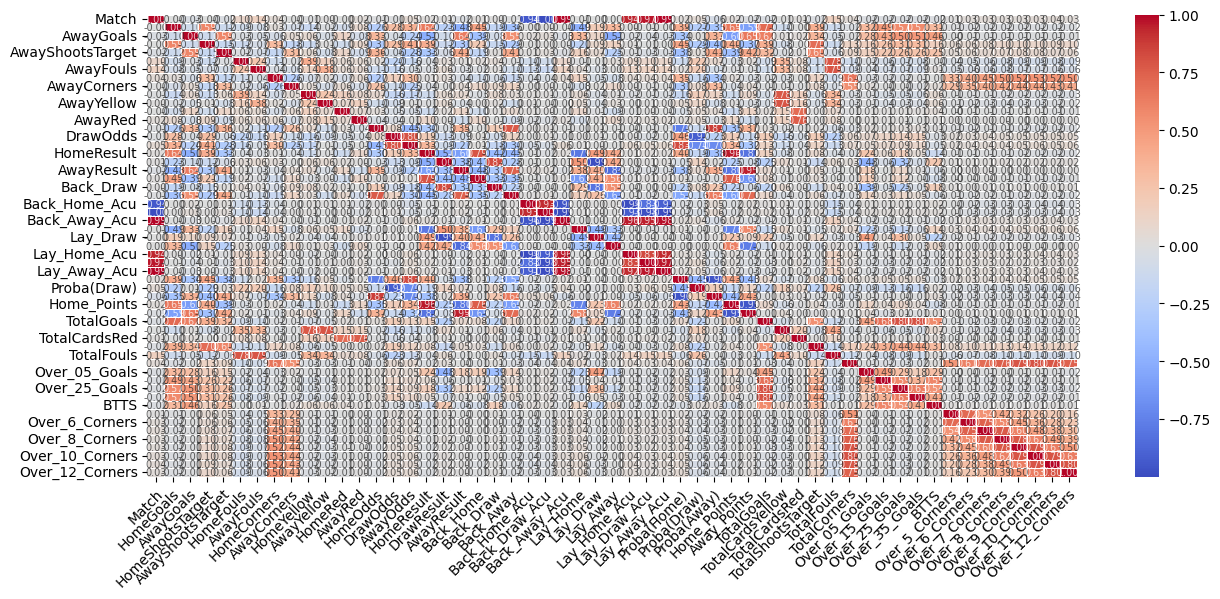

In [86]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5,annot_kws={'size': 'x-small', 'alpha': 0.75})
ax.set(xlabel="", ylabel="")
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
plt.show();

#### **Export Datasets**

In [154]:
#Export file base full
df.to_csv('df_stats_football_full.csv')
files.download('df_stats_football_full.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [153]:
#Export file summary stats
df_stats.to_excel('df_stats_football.xlsx')
files.download('df_stats_football.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Data Prep to Machine Learnig Models**

In [90]:
df_stats = df_stats.reset_index()

In [91]:
df_Home = df_stats[[
'Team',
'Home_Wins',
'Home_Draws',
'Home_Loss',
'Mean_Goals_Home',
'Std_Goals_Home',
'Cv_Goals_Home',
'Mean_Points_Home',
'Std_Points_Home',
'Cv_Points_Home',
'Mean_Corners_Home',
'Std_Corners_Home',
'Cv_Corners_Home',
'Mean_Cards_Yellow_Home',
'Std_Cards_Yellow_Home',
'Cv_Cards_Yellow_Home',
'Mean_Cards_Red_Home',
'Std_Cards_Red_Home',
'Cv_Cards_Red_Home',
'Mean_Shoots_Target_Home',
'Std_Shoots_Target_Home',
'Cv_Shoots_Target_Home',
'Mean_Fouls_Home',
'Std_Fouls_Home',
'Cv_Fouls_Home',
'Over_05_Goals_Home',
'Over_15_Goals_Home',
'Over_25_Goals_Home',
'Over_35_Goals_Home',
'BTTS_Home',
'Over_5_Corners_Home',
'Over_6_Corners_Home',
'Over_7_Corners_Home',
'Over_8_Corners_Home',
'Over_9_Corners_Home',
'Over_10_Corners_Home',
'Over_11_Corners_Home',
'Over_12_Corners_Home',
]]

In [92]:
df_Home =  df_Home.rename(columns={'Team':'Home'})
df_Home.head()

Home  Home_Wins  Home_Draws  Home_Loss  Mean_Goals_Home  \
0       Augsburg       0.34        0.28       0.39             1.43   
1  Bayern Munich       0.78        0.16       0.06             3.10   
2      Bielefeld       0.24        0.35       0.41             0.82   
3         Bochum       0.46        0.20       0.34             1.43   
4      Darmstadt       0.23        0.26       0.51             0.97   

   Std_Goals_Home  Cv_Goals_Home  Mean_Points_Home  Std_Points_Home  \
0            1.12           0.78              1.28             1.29   
1            1.82           0.59              2.49             0.98   
2            0.76           0.93              1.06             1.18   
3            1.27           0.89              1.57             1.38   
4            0.98           1.01              0.94             1.21   

   Cv_Points_Home  Mean_Corners_Home  Std_Corners_Home  Cv_Corners_Home  \
0            1.01               4.34              2.63             0.61   
1            0.39               7.72              3.39             0.44   
2            1.11               4.18              2.55             0.61   
3            0.88               4.54              2.56             0.56   
4            1.29               3.23              1.80             0.56   

   Mean_Cards_Yellow_Home  Std_Cards_Yellow_Home  Cv_Cards_Yellow_Home  \
0                    3.95                   1.97                  0.50   
1                    2.44                   1.58                  0.65   
2                    3.59                   2.06                  0.57   
3                    3.80                   2.13                  0.56   
4                    3.91                   1.82                  0.47   

   Mean_Cards_Red_Home  Std_Cards_Red_Home  Cv_Cards_Red_Home  \
0                 0.14                0.45               3.21   
1                 0.10                0.33               3.30   
2                 0.09                0.29               3.22   
3                 0.06                0.24               4.00   
4                 0.17                0.45               2.65   

   Mean_Shoots_Target_Home  Std_Shoots_Target_Home  Cv_Shoots_Target_Home  \
0                     4.40                    2.47                   0.56   
1                     8.31                    3.18                   0.38   
2                     3.50                    1.83                   0.52   
3                     5.03                    2.32                   0.46   
4                     3.20                    1.88                   0.59   

   Mean_Fouls_Home  Std_Fouls_Home  Cv_Fouls_Home  Over_05_Goals_Home  \
0            13.20            4.03           0.31                0.94   
1             9.30            3.47           0.37                0.99   
2            11.68            3.20           0.27                0.91   
3            12.40            2.81           0.23                0.94   
4            15.74            3.58           0.23                0.91   

   Over_15_Goals_Home  Over_25_Goals_Home  Over_35_Goals_Home  BTTS_Home  \
0                0.82                0.59                0.37       0.62   
1                0.92                0.73                0.56       0.52   
2                0.65                0.35                0.18       0.44   
3                0.83                0.49                0.26       0.51   
4                0.80                0.51                0.26       0.49   

   Over_5_Corners_Home  Over_6_Corners_Home  Over_7_Corners_Home  \
0                 0.86                 0.77                 0.66   
1                 0.91                 0.84                 0.79   
2                 0.94                 0.82                 0.79   
3                 0.94                 0.83                 0.77   
4                 0.83                 0.71                 0.66   

   Over_8_Corners_Home  Over_9_Corners_Home  Over_10_Corners_Home  \
0                 0.52            

In [93]:
df_Home.shape

(214, 38)

In [94]:
df_Away = df_stats[[
'Team',
'Away_Wins',
'Away_Draws',
'Away_Loss',
'Mean_Goals_Away',
'Std_Goals_Away',
'Cv_Goals_Away',
'Mean_Points_Away',
'Std_Points_Away',
'Cv_Points_Away',
'Mean_Corners_Away',
'Std_Corners_Away',
'Cv_Corners_Away',
'Mean_Cards_Yellow_Away',
'Std_Cards_Yellow_Away',
'Cv_Cards_Yellow_Away',
'Mean_Cards_Red_Away',
'Std_Cards_Red_Away',
'Cv_Cards_Red_Away',
'Mean_Shoots_Target_Away',
'Std_Shoots_Target_Away',
'Cv_Shoots_Target_Away',
'Mean_Fouls_Away',
'Std_Fouls_Away',
'Cv_Fouls_Away',
'Over_05_Goals_Away',
'Over_15_Goals_Away',
'Over_25_Goals_Away',
'Over_35_Goals_Away',
'BTTS_Away',
'Over_5_Corners_Away',
'Over_6_Corners_Away',
'Over_7_Corners_Away',
'Over_8_Corners_Away',
'Over_9_Corners_Away',
'Over_10_Corners_Away',
'Over_11_Corners_Away',
'Over_12_Corners_Away'
]]

In [95]:
df_Away =  df_Away.rename(columns={'Team':'Away'})
df_Away.head()

Away  Away_Wins  Away_Draws  Away_Loss  Mean_Goals_Away  \
0       Augsburg       0.24        0.22       0.54             1.05   
1  Bayern Munich       0.69        0.15       0.16             2.25   
2      Bielefeld       0.18        0.26       0.56             0.74   
3         Bochum       0.17        0.17       0.67             0.86   
4      Darmstadt       0.22        0.17       0.61             0.94   

   Std_Goals_Away  Cv_Goals_Away  Mean_Points_Away  Std_Points_Away  \
0            0.97           0.92              0.94             1.23   
1            1.47           0.65              2.22             1.20   
2            0.83           1.12              0.79             1.12   
3            0.99           1.15              0.67             1.12   
4            0.86           0.91              0.83             1.23   

   Cv_Points_Away  Mean_Corners_Away  Std_Corners_Away  Cv_Corners_Away  \
0            1.31               3.94              2.29             0.58   
1            0.54               6.23              2.82             0.45   
2            1.42               3.62              2.52             0.70   
3            1.67               3.36              2.09             0.62   
4            1.48               3.89              2.15             0.55   

   Mean_Cards_Yellow_Away  Std_Cards_Yellow_Away  Cv_Cards_Yellow_Away  \
0                    3.73                   2.08                  0.56   
1                    3.17                   1.97                  0.62   
2                    3.12                   2.17                  0.70   
3                    3.47                   1.75                  0.50   
4                    4.11                   1.79                  0.44   

   Mean_Cards_Red_Away  Std_Cards_Red_Away  Cv_Cards_Red_Away  \
0                 0.12                0.38               3.17   
1                 0.11                0.31               2.82   
2                 0.06                0.24               4.00   
3                 0.08                0.28               3.50   
4                 0.22                0.48               2.18   

   Mean_Shoots_Target_Away  Std_Shoots_Target_Away  Cv_Shoots_Target_Away  \
0                     3.72                    1.87                   0.50   
1                     6.41                    2.97                   0.46   
2                     3.03                    1.68                   0.55   
3                     3.47                    2.09                   0.60   
4                     2.97                    1.61                   0.54   

   Mean_Fouls_Away  Std_Fouls_Away  Cv_Fouls_Away  Over_05_Goals_Away  \
0            13.62            4.22           0.31                0.91   
1            10.52            3.60           0.34                0.95   
2            12.56            3.71           0.30                0.91   
3            12.92            3.90           0.30                1.00   
4            15.61            4.21           0.27                0.97   

   Over_15_Goals_Away  Over_25_Goals_Away  Over_35_Goals_Away  BTTS_Away  \
0                0.74                0.51                0.32       0.53   
1                0.82                0.65                0.45       0.55   
2                0.74                0.44                0.26       0.38   
3                0.83                0.58                0.33       0.47   
4                0.78                0.50                0.36       0.50   

   Over_5_Corners_Away  Over_6_Corners_Away  Over_7_Corners_Away  \
0                 0.90                 0.82                 0.75   
1                 0.89                 0.83                 0.72   
2                 0.85                 0.82                 0.62   
3                 0.86                 0.81                 0.61   
4                 0.97                 0.81                 0.78   

   Over_8_Corners_Away  Over_9_Corners_Away  Over_10_Corners_Away  \
0                 0.61            

In [96]:
df_Away.shape

(214, 38)

In [97]:
df.head()

Match          League Season       Date     Home         Away  HomeGoals  \
0      1          Calcio  23-24 2023-09-03    Lecce  Salernitana          2   
1      2          LaLiga  23-24 2023-09-03  Osasuna    Barcelona          1   
2      3   Liga Portugal  23-24 2023-09-03  Estoril     Boavista          1   
3      4   Liga Portugal  23-24 2023-09-03   Chaves   Moreirense          1   
4      5  Premier League  23-24 2023-09-03  Arsenal   Man United          3   

   AwayGoals Result  HomeShootsTarget  AwayShootsTarget  HomeFouls  AwayFouls  \
0          0      H                 6                 4         17         15   
1          2      A                 3                 4          6         16   
2          2      A                 4                 8         21         12   
3          2      A                 3                 2         14         21   
4          1      H                 5                 2          8          7   

   HomeCorners  AwayCorners  HomeYellow  AwayYellow  HomeRed  AwayRed  \
0            6            5           3           3        0        0   
1            8            5           1           3        1        0   
2           10            5           3           1        0        0   
3            3            4           3           4        0        0   
4           12            3           2           3        0        0   

   HomeOdds  DrawOdds  AwayOdds  HomeResult  DrawResult  AwayResult  \
0      2.00      3.30      4.00           1           0           0   
1      5.25      4.00      1.65           0           0           1   
2      2.40      3.25      2.90           0           0           1   
3      2.40      3.25      2.88           0           0           1   
4      1.75      3.80      4.50           1           0           0   

   Back_Home  Back_Draw  Back_Away  Back_Home_Acu  Back_Draw_Acu  \
0       1.00       -1.0      -1.00           1.00           -1.0   
1      -1.00       -1.0       4.25           0.00           -2.0   
2      -1.00       -1.0       1.40          -1.00           -3.0   
3      -1.00       -1.0       1.40          -2.00           -4.0   
4       0.75       -1.0      -1.00          -1.25           -5.0   

   Back_Away_Acu  Lay_Home  Lay_Draw  Lay_Away  Lay_Home_Acu  Lay_Draw_Acu  \
0          -1.00     -1.00      0.43      0.33         -1.00          0.43   
1           3.25      0.23      0.33     -1.00         -0.77          0.76   
2           4.65      0.71      0.44     -1.00         -0.06          1.20   
3           6.05      0.71      0.44     -1.00          0.65          1.64   
4           5.05     -1.00      0.36      0.28         -0.35          2.00   

   Lay_Away_Acu  Proba(Home)  Proba(Draw)  Proba(Away)  Home_Points  \
0          0.33         0.50         0.30         0.25            3   
1         -0.67         0.19         0.25         0.61            0   
2         -1.67         0.42         0.31         0.34            0   
3         -2.67         0.42         0.31         0.35            0   
4         -2.39         0.57         0.26         0.22            3   

   Away_Points  TotalGoals  TotalCardsYellow  TotalCardsRed  \
0            0           2                 6              0   
1            3           3                 4              1   
2            3           3                 4              0   
3            3           3                 7              0   
4            0           4                 5              0   

   TotalShootsTarget  TotalFouls  TotalCorners  Over_05_Goals  Over_15_Goals  \
0                 10          32            11              1              1   
1                  7          22            13              1              1   
2                 12          33            15              1              1   
3                  5          35             7              1              1   
4                  7          15            15              1              1   

   Over_25

In [99]:
df_full = df[['Date', 'League', 'Season', 'Home', 'Away', 'HomeOdds', 'DrawOdds', 'AwayOdds', 'Proba(Home)', 'Proba(Draw)', 'Proba(Away)', 'HomeResult']]
df_full

Date          League Season         Home         Away  HomeOdds  \
0     2023-09-03          Calcio  23-24        Lecce  Salernitana      2.00   
1     2023-09-03          LaLiga  23-24      Osasuna    Barcelona      5.25   
2     2023-09-03   Liga Portugal  23-24      Estoril     Boavista      2.40   
3     2023-09-03   Liga Portugal  23-24       Chaves   Moreirense      2.40   
4     2023-09-03  Premier League  23-24      Arsenal   Man United      1.75   
...          ...             ...    ...          ...          ...       ...   
20153 2014-08-09         Ligue 1  14-15     Guingamp   St Etienne      3.30   
20154 2014-08-09         Ligue 1  14-15        Lille         Metz      1.50   
20155 2014-08-09         Ligue 1  14-15  Montpellier     Bordeaux      2.30   
20156 2014-08-09         Ligue 1  14-15       Nantes         Lens      2.00   
20157 2014-08-08         Ligue 1  14-15        Reims     Paris SG      9.50   

       DrawOdds  AwayOdds  Proba(Home)  Proba(Draw)  Proba(Away)  HomeResult  
0          3.30      4.00         0.50         0.30         0.25           1  
1          4.00      1.65         0.19         0.25         0.61           0  
2          3.25      2.90         0.42         0.31         0.34           0  
3          3.25      2.88         0.42         0.31         0.35           0  
4          3.80      4.50         0.57         0.26         0.22           1  
...         ...       ...          ...          ...          ...         ...  
20153      3.10      2.30         0.30         0.32         0.43           0  
20154      4.10      6.50         0.67         0.24         0.15           0  
20155      3.10      3.20         0.43         0.32         0.31           0  
20156      3.25      3.90         0.50         0.31         0.26           1  
20157      4.50      1.36         0.11         0.22         0.74           0  

[20158 rows x 12 columns]

In [100]:
df_full = df_full.merge(df_Home, on='Home', how='left')
df_full = df_full.merge(df_Away, on='Away', how='left')
df_full.head()

Date          League Season     Home         Away  HomeOdds  DrawOdds  \
0 2023-09-03          Calcio  23-24    Lecce  Salernitana      2.00      3.30   
1 2023-09-03          LaLiga  23-24  Osasuna    Barcelona      5.25      4.00   
2 2023-09-03   Liga Portugal  23-24  Estoril     Boavista      2.40      3.25   
3 2023-09-03   Liga Portugal  23-24   Chaves   Moreirense      2.40      3.25   
4 2023-09-03  Premier League  23-24  Arsenal   Man United      1.75      3.80   

   AwayOdds  Proba(Home)  Proba(Draw)  Proba(Away)  HomeResult  Home_Wins  \
0      4.00         0.50         0.30         0.25           1       0.22   
1      1.65         0.19         0.25         0.61           0       0.33   
2      2.90         0.42         0.31         0.34           0       0.32   
3      2.88         0.42         0.31         0.35           0       0.29   
4      4.50         0.57         0.26         0.22           1       0.66   

   Home_Draws  Home_Loss  Mean_Goals_Home  Std_Goals_Home  Cv_Goals_Home  \
0        0.32       0.45             1.30            0.94           0.72   
1        0.28       0.39             1.15            1.02           0.89   
2        0.25       0.43             1.15            1.01           0.88   
3        0.33       0.38             1.33            1.10           0.83   
4        0.19       0.16             2.08            1.33           0.64   

   Mean_Points_Home  Std_Points_Home  Cv_Points_Home  Mean_Corners_Home  \
0              1.00             1.18            1.18               5.28   
1              1.27             1.29            1.02               4.62   
2              1.21             1.31            1.08               4.60   
3              1.19             1.24            1.04               5.52   
4              2.16             1.20            0.56               6.97   

   Std_Corners_Home  Cv_Corners_Home  Mean_Cards_Yellow_Home  \
0              2.56             0.48                    5.12   
1              2.20             0.48                    4.73   
2              2.80             0.61                    5.38   
3              2.83             0.51                    5.42   
4              3.36             0.48                    3.36   

   Std_Cards_Yellow_Home  Cv_Cards_Yellow_Home  Mean_Cards_Red_Home  \
0                   1.94                  0.38                 0.18   
1                   2.29                  0.48                 0.23   
2                   2.67                  0.50                 0.36   
3                   2.83                  0.52                 0.48   
4                   2.12                  0.63                 0.14   

   Std_Cards_Red_Home  Cv_Cards_Red_Home  Mean_Shoots_Target_Home  \
0                0.59               3.28                     4.22   
1                0.55               2.39                     4.07   
2                0.88               2.44                     3.94   
3                0.83               1.73                     4.33   
4                0.37               2.64                     5.99   

   Std_Shoots_Target_Home  Cv_Shoots_Target_Home  Mean_Fouls_Home  \
0                    2.73                   0.65            13.55   
1                    2.39                   0.59            14.21   
2                    2.33                   0.59            15.28   
3                    2.09                   0.48            13.79   
4                    2.75                   0.46            10.07   

   Std_Fouls_Home  Cv_Fouls_Home  Over_05_Goals_Home  Over_15_Goals_Home  \
0            4.05           0.30                0.98                0.80   
1            3.82           0.27                0.88                0.77   
2            4.50           0.29                0.92                0.81   
3            4.28           0.31                0.92                0.81   
4            2.88           0.29                0.95                0.85   

   Over_25_Goals_Home  Over_35_Goals_Home  BTTS_Hom

In [101]:
df_full.isnull().sum()

Date                        0
League                      0
Season                      0
Home                        0
Away                        0
HomeOdds                    0
DrawOdds                    0
AwayOdds                    0
Proba(Home)                 0
Proba(Draw)                 0
Proba(Away)                 0
HomeResult                  0
Home_Wins                   0
Home_Draws                  0
Home_Loss                   0
Mean_Goals_Home             0
Std_Goals_Home              2
Cv_Goals_Home               2
Mean_Points_Home            0
Std_Points_Home             2
Cv_Points_Home              4
Mean_Corners_Home           0
Std_Corners_Home            2
Cv_Corners_Home             2
Mean_Cards_Yellow_Home      0
Std_Cards_Yellow_Home       2
Cv_Cards_Yellow_Home        2
Mean_Cards_Red_Home         0
Std_Cards_Red_Home          2
Cv_Cards_Red_Home          43
Mean_Shoots_Target_Home     0
Std_Shoots_Target_Home      2
Cv_Shoots_Target_Home       2
Mean_Fouls

In [102]:
df_full.shape

(20158, 86)

In [103]:
df_full =  df_full.dropna()

In [104]:
df_full.shape

(20088, 86)

In [105]:
df_full.Season.unique()

array(['23-24', '22-23', '21-22', '20-21', '19-20', '18-19', '17-18',
       '16-17', '15-16', '14-15'], dtype=object)

In [155]:
season_train = ['22-23', '21-22', '20-21', '19-20', '18-19', '17-18','16-17', '15-16']
season_test = ['23-24']

In [156]:
train = df_full[df_full['Season'].isin(season_train)]
test = df_full[df_full['Season'].isin(season_test)]

In [157]:
train.shape

(18040, 86)

In [158]:
test.shape

(223, 86)

#### **Balanced Target Analysis**

In [159]:
balanced = train.groupby(['HomeResult']).agg({'HomeResult':'count'})
balanced['PERCENT'] = round(balanced['HomeResult'] / len(train), 2)
balanced

HomeResult  PERCENT
HomeResult                     
0                 9990     0.55
1                 8050     0.45

### **Supervised Machine Learning Models - Classification**

O **aprendizado supervisionado** ocorre a partir de resultados pré-definidos, nesse estudo de caso os dados das partidas de futebol, utilizando os valores passados da variável target (resultados das partidas anteriores) para aprender quais devem ser seus resultados de saída.

Nos **modelos de classificação**, geralmente teremos como resultado de saída uma variável binaria de valor entre 0 e 1. Quanto mais próximo de 1 estiver o valor da predição, podemos considerar que a amostra pertence a uma determinada classe (nesse projeto seria o time mandante vencer, mais conhecido como "**Back Home**"), e quanto mais próximo de zero estiver o valor, a amostra pertence à outra classe (time mandante nao vencer a partida, "**Lay Home**").

#### **Logistic Regression**

A **regressão logística** busca estimar a probabilidade de ocorrência de um determinado evento, nesse projeto o evento é o resultado da partida, com base em um determinado conjunto de dados de **variáveis independentes**. Como o resultado é uma probabilidade, **a variável dependente é limitada entre 0 e 1**. Na regressão logística, uma **transformação logit** é aplicada com base nas probabilidades, ou seja, a probabilidade de sucesso dividida pela probabilidade de falha. Isso também é comumente conhecido como "log odds", ou logaritmo natural de probabilidades

In [160]:
X = train[['HomeOdds',
       'DrawOdds', 'AwayOdds', 'Proba(Home)', 'Proba(Draw)', 'Proba(Away)',
       'Home_Wins', 'Home_Draws', 'Home_Loss', 'Mean_Goals_Home',
       'Std_Goals_Home', 'Cv_Goals_Home', 'Mean_Points_Home',
       'Std_Points_Home', 'Cv_Points_Home', 'Mean_Corners_Home',
       'Std_Corners_Home', 'Cv_Corners_Home', 'Mean_Cards_Yellow_Home',
       'Std_Cards_Yellow_Home', 'Cv_Cards_Yellow_Home', 'Mean_Cards_Red_Home',
       'Std_Cards_Red_Home', 'Cv_Cards_Red_Home', 'Mean_Shoots_Target_Home',
       'Std_Shoots_Target_Home', 'Cv_Shoots_Target_Home', 'Mean_Fouls_Home',
       'Std_Fouls_Home', 'Cv_Fouls_Home', 'Over_05_Goals_Home',
       'Over_15_Goals_Home', 'Over_25_Goals_Home', 'Over_35_Goals_Home',
       'BTTS_Home', 'Over_5_Corners_Home', 'Over_6_Corners_Home',
       'Over_7_Corners_Home', 'Over_8_Corners_Home', 'Over_9_Corners_Home',
       'Over_10_Corners_Home', 'Over_11_Corners_Home', 'Over_12_Corners_Home',
       'Away_Wins', 'Away_Draws', 'Away_Loss', 'Mean_Goals_Away',
       'Std_Goals_Away', 'Cv_Goals_Away', 'Mean_Points_Away',
       'Std_Points_Away', 'Cv_Points_Away', 'Mean_Corners_Away',
       'Std_Corners_Away', 'Cv_Corners_Away', 'Mean_Cards_Yellow_Away',
       'Std_Cards_Yellow_Away', 'Cv_Cards_Yellow_Away', 'Mean_Cards_Red_Away',
       'Std_Cards_Red_Away', 'Cv_Cards_Red_Away', 'Mean_Shoots_Target_Away',
       'Std_Shoots_Target_Away', 'Cv_Shoots_Target_Away', 'Mean_Fouls_Away',
       'Std_Fouls_Away', 'Cv_Fouls_Away', 'Over_05_Goals_Away',
       'Over_15_Goals_Away', 'Over_25_Goals_Away', 'Over_35_Goals_Away',
       'BTTS_Away', 'Over_5_Corners_Away', 'Over_6_Corners_Away',
       'Over_7_Corners_Away', 'Over_8_Corners_Away', 'Over_9_Corners_Away',
       'Over_10_Corners_Away', 'Over_11_Corners_Away', 'Over_12_Corners_Away']]
y = train[['HomeResult']]

In [161]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [162]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C)

logreg = LogisticRegression()

Cs = np.logspace(-6, -1, 10)
clf = GridSearchCV(estimator=logreg, param_grid = hyperparameters, cv=5, verbose=0)

# Fit grid search
best_model = clf.fit(X_train, y_train)

In [115]:
# model = LogisticRegression()
# model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [163]:
#Aplicando o Modelo na base de teste
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)

In [164]:
#Imprimindo os Resultados do Modelo
#Relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits = 4))
#Acuracidade
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))
#AUC
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.6926    0.7700    0.7292      2013
           1     0.6620    0.5687    0.6118      1595

    accuracy                         0.6810      3608
   macro avg     0.6773    0.6693    0.6705      3608
weighted avg     0.6791    0.6810    0.6773      3608

Acurácia: 0.6810

AUC: 0.6693



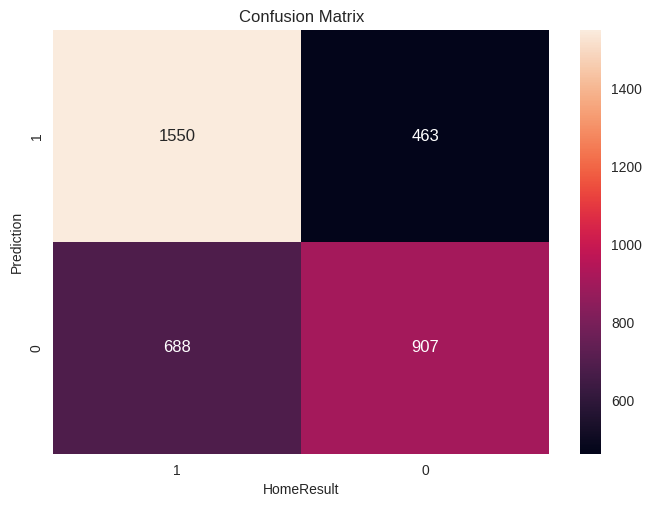

In [165]:
#Matriz de confusao
cm = confusion_matrix(y_test, y_pred)

#Plot the confusion matrix.
sns.heatmap(cm,
			      annot=True,
		      	fmt='g',
		      	xticklabels=['1','0'],
		      	yticklabels=['1','0'])
plt.ylabel('Prediction',fontsize=10)
plt.xlabel('HomeResult',fontsize=10)
plt.title('Confusion Matrix',fontsize=12)
plt.show()

ROC AUC: 65.64 %


Text(0, 0.5, 'Verdadeiro Positive')

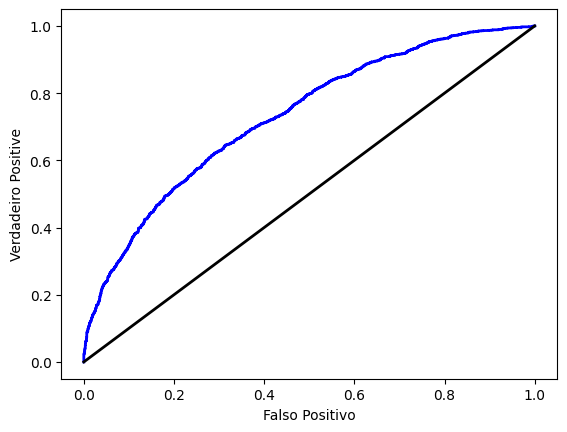

In [118]:
#Imprimindo o valor do AUC
print('ROC AUC: %.2f' % (roc_auc_score(y_test, y_pred)*100), '%')
#Plotando Curva AUC
y_probs = best_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, lw = 2, color ='blue')
plt.plot([0,1], [0,1], lw = 2, color ='black')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positive')

In [119]:
#Feature Importance
coefficients = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})

In [120]:
#Fetures Importance High
feature_importance_high = round(feature_importance[feature_importance['Importance'] > 0.5], 2).sort_values(by='Importance', ascending=False)
feature_importance_high

Feature  Importance
7         Home_Draws        1.04
3        Proba(Home)        0.99
44        Away_Draws        0.93
51    Cv_Points_Away        0.87
12  Mean_Points_Home        0.82
5        Proba(Away)        0.79
6          Home_Wins        0.61
13   Std_Points_Home        0.60

In [ ]:
#Fetures Importance Low
feature_importance_low = round(feature_importance[feature_importance['Importance'] < 0.5], 2).sort_values(by='Importance', ascending=False)
feature_importance_low

##### **Validation Logistic Regression - Season 23-24**

In [124]:
X_new = test[['HomeOdds',
       'DrawOdds', 'AwayOdds', 'Proba(Home)', 'Proba(Draw)', 'Proba(Away)',
       'Home_Wins', 'Home_Draws', 'Home_Loss', 'Mean_Goals_Home',
       'Std_Goals_Home', 'Cv_Goals_Home', 'Mean_Points_Home',
       'Std_Points_Home', 'Cv_Points_Home', 'Mean_Corners_Home',
       'Std_Corners_Home', 'Cv_Corners_Home', 'Mean_Cards_Yellow_Home',
       'Std_Cards_Yellow_Home', 'Cv_Cards_Yellow_Home', 'Mean_Cards_Red_Home',
       'Std_Cards_Red_Home', 'Cv_Cards_Red_Home', 'Mean_Shoots_Target_Home',
       'Std_Shoots_Target_Home', 'Cv_Shoots_Target_Home', 'Mean_Fouls_Home',
       'Std_Fouls_Home', 'Cv_Fouls_Home', 'Over_05_Goals_Home',
       'Over_15_Goals_Home', 'Over_25_Goals_Home', 'Over_35_Goals_Home',
       'BTTS_Home', 'Over_5_Corners_Home', 'Over_6_Corners_Home',
       'Over_7_Corners_Home', 'Over_8_Corners_Home', 'Over_9_Corners_Home',
       'Over_10_Corners_Home', 'Over_11_Corners_Home', 'Over_12_Corners_Home',
       'Away_Wins', 'Away_Draws', 'Away_Loss', 'Mean_Goals_Away',
       'Std_Goals_Away', 'Cv_Goals_Away', 'Mean_Points_Away',
       'Std_Points_Away', 'Cv_Points_Away', 'Mean_Corners_Away',
       'Std_Corners_Away', 'Cv_Corners_Away', 'Mean_Cards_Yellow_Away',
       'Std_Cards_Yellow_Away', 'Cv_Cards_Yellow_Away', 'Mean_Cards_Red_Away',
       'Std_Cards_Red_Away', 'Cv_Cards_Red_Away', 'Mean_Shoots_Target_Away',
       'Std_Shoots_Target_Away', 'Cv_Shoots_Target_Away', 'Mean_Fouls_Away',
       'Std_Fouls_Away', 'Cv_Fouls_Away', 'Over_05_Goals_Away',
       'Over_15_Goals_Away', 'Over_25_Goals_Away', 'Over_35_Goals_Away',
       'BTTS_Away', 'Over_5_Corners_Away', 'Over_6_Corners_Away',
       'Over_7_Corners_Away', 'Over_8_Corners_Away', 'Over_9_Corners_Away',
       'Over_10_Corners_Away', 'Over_11_Corners_Away', 'Over_12_Corners_Away']]

In [125]:
y_pred_new = best_model.predict(X_new)

In [126]:
test['Predict'] = y_pred_new
test.head();

<ipython-input-126-4b27781abe29>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Profit: 4.16 Stakes em 78 jogos
ROI: 5.33 %


<ipython-input-127-c0320b7d8f44>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-127-c0320b7d8f44>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



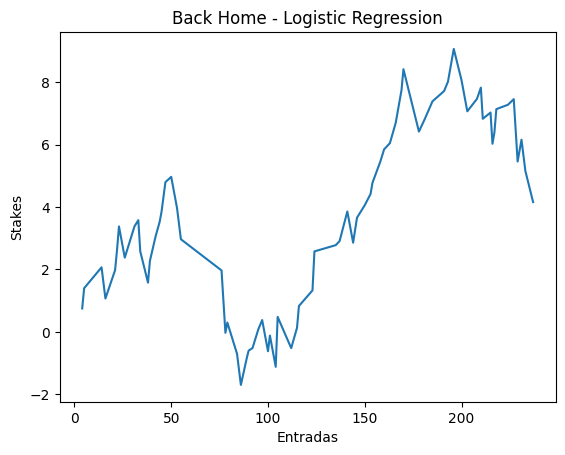

In [127]:
flt = test.Predict == 1
df_test = test[flt]

df_test.loc[(df_test['HomeResult'] == 1), 'Profit'] = df['HomeOdds'] - 1
df_test.loc[(df_test['HomeResult'] != 1), 'Profit'] = -1

df_test['Profit_Acu'] = df_test.Profit.cumsum()

profit = round(df_test.Profit_Acu.tail(1).item(), 2)

ROI = round((df_test.Profit_Acu.tail(1) / len(df_test) * 100).item(), 2)

df_test.Profit_Acu.plot(title='Back Home - Logistic Regression', xlabel='Entradas', ylabel='Stakes')

print('Profit:', profit, 'Stakes em', len(df_test), 'jogos')
print('ROI:', ROI, "%")

#### **Random Forest**

In [128]:
#Tunning Hiperparameters with GridSearchCV
param_grid = {'bootstrap': [True],
              'max_depth': [6,10],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [3,5],
              'min_samples_split': [4,6],
              'n_estimators': [100,350]
              }

#Set model
rfc = RandomForestClassifier()

#Test parameters
forest_grid_search = GridSearchCV(rfc,
                                  param_grid,
                                  cv=5,
                                  scoring='accuracy',
                                  return_train_score=True,
                                  verbose=True,

                                  n_jobs=-1)
# Fit grid search
best_model = forest_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [ ]:
#Tunning Hiperparameters with RandomizedSearchCV
param_space= {'bootstrap': [True],
              'max_depth': [6,8,10,12,14],
              'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_leaf': [2,3,4],
              'min_samples_split': [2,3,4,5],
              'n_estimators': [100,200,300,400,500,600,700,800,900,1000]
              }

#Set model
rfc = RandomForestClassifier()

#Test parameters
forest_rand_search = RandomizedSearchCV(rfc,
                                  param_space,
                                  n_iter=32,
                                  cv=5,
                                  scoring='accuracy',
                                  return_train_score=True,
                                  verbose=True,
                                  random_state=42,
                                  n_jobs=-1)
# Fit grid search
best_model = forest_rand_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [ ]:
#Definindo o Modelo
# model = RandomForestClassifier(random_state=42)
# model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)

In [129]:
#Aplicando o Modelo na base de teste
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)

In [130]:
#Imprimindo os Resultados do Modelo
#Relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits = 4))
#Acuracidade
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))
#AUC
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.6611    0.7890    0.7194      2156
           1     0.6750    0.5201    0.5875      1817

    accuracy                         0.6660      3973
   macro avg     0.6680    0.6545    0.6534      3973
weighted avg     0.6675    0.6660    0.6591      3973

Acurácia: 0.6660

AUC: 0.6545



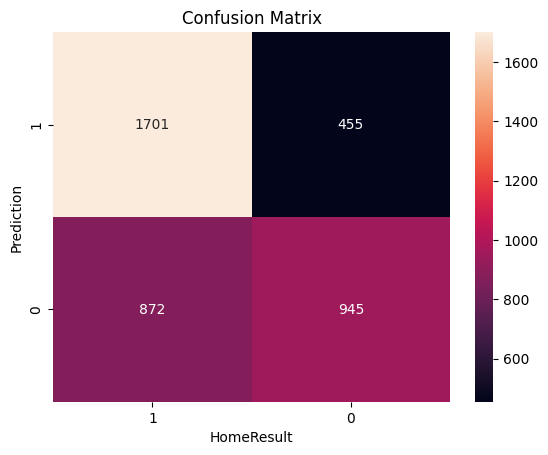

In [131]:
#Matriz de confusao
cm = confusion_matrix(y_test, y_pred)

#Plot the confusion matrix.
sns.heatmap(cm,
			      annot=True,
		      	fmt='g',
		      	xticklabels=['1','0'],
		      	yticklabels=['1','0'])
plt.ylabel('Prediction',fontsize=10)
plt.xlabel('HomeResult',fontsize=10)
plt.title('Confusion Matrix',fontsize=12)
plt.show()

ROC AUC: 65.45 %


Text(0, 0.5, 'Verdadeiro Positive')

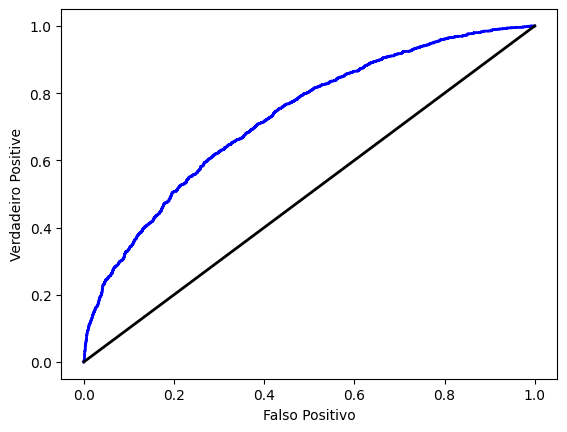

In [132]:
#Imprimindo o valor do AUC
print('ROC AUC: %.2f' % (roc_auc_score(y_test, y_pred)*100), '%')
#Plotando Curva AUC
y_probs = best_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, lw = 2, color ='blue')
plt.plot([0,1], [0,1], lw = 2, color ='black')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positive')

##### **Validation Random Forest - Season 23-24**

In [ ]:
X_new = test[['HomeOdds',
       'DrawOdds', 'AwayOdds', 'Proba(Home)', 'Proba(Draw)', 'Proba(Away)',
       'Home_Wins', 'Home_Draws', 'Home_Loss', 'Mean_Goals_Home',
       'Std_Goals_Home', 'Cv_Goals_Home', 'Mean_Points_Home',
       'Std_Points_Home', 'Cv_Points_Home', 'Mean_Corners_Home',
       'Std_Corners_Home', 'Cv_Corners_Home', 'Mean_Cards_Yellow_Home',
       'Std_Cards_Yellow_Home', 'Cv_Cards_Yellow_Home', 'Mean_Cards_Red_Home',
       'Std_Cards_Red_Home', 'Cv_Cards_Red_Home', 'Mean_Shoots_Target_Home',
       'Std_Shoots_Target_Home', 'Cv_Shoots_Target_Home', 'Mean_Fouls_Home',
       'Std_Fouls_Home', 'Cv_Fouls_Home', 'Over_05_Goals_Home',
       'Over_15_Goals_Home', 'Over_25_Goals_Home', 'Over_35_Goals_Home',
       'BTTS_Home', 'Over_5_Corners_Home', 'Over_6_Corners_Home',
       'Over_7_Corners_Home', 'Over_8_Corners_Home', 'Over_9_Corners_Home',
       'Over_10_Corners_Home', 'Over_11_Corners_Home', 'Over_12_Corners_Home',
       'Away_Wins', 'Away_Draws', 'Away_Loss', 'Mean_Goals_Away',
       'Std_Goals_Away', 'Cv_Goals_Away', 'Mean_Points_Away',
       'Std_Points_Away', 'Cv_Points_Away', 'Mean_Corners_Away',
       'Std_Corners_Away', 'Cv_Corners_Away', 'Mean_Cards_Yellow_Away',
       'Std_Cards_Yellow_Away', 'Cv_Cards_Yellow_Away', 'Mean_Cards_Red_Away',
       'Std_Cards_Red_Away', 'Cv_Cards_Red_Away', 'Mean_Shoots_Target_Away',
       'Std_Shoots_Target_Away', 'Cv_Shoots_Target_Away', 'Mean_Fouls_Away',
       'Std_Fouls_Away', 'Cv_Fouls_Away', 'Over_05_Goals_Away',
       'Over_15_Goals_Away', 'Over_25_Goals_Away', 'Over_35_Goals_Away',
       'BTTS_Away', 'Over_5_Corners_Away', 'Over_6_Corners_Away',
       'Over_7_Corners_Away', 'Over_8_Corners_Away', 'Over_9_Corners_Away',
       'Over_10_Corners_Away', 'Over_11_Corners_Away', 'Over_12_Corners_Away']]

In [ ]:
y_pred_new = best_model.predict(X_new)

In [ ]:
test['Predict'] = y_pred_new
test.head();

<ipython-input-126-4b27781abe29>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Profit: 4.16 Stakes em 78 jogos
ROI: 5.33 %


<ipython-input-127-c0320b7d8f44>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-127-c0320b7d8f44>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



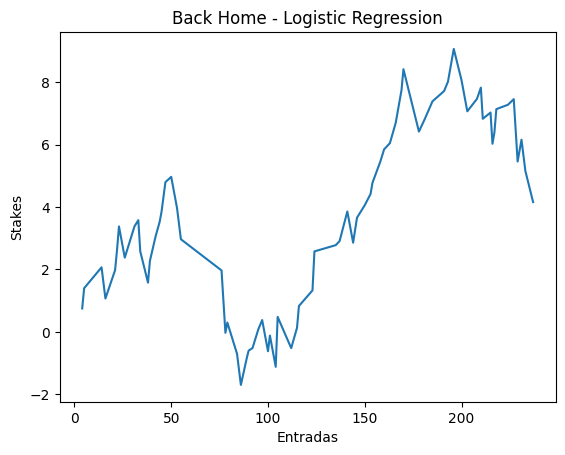

In [ ]:
flt = test.Predict == 1
df_test = test[flt]

df_test.loc[(df_test['HomeResult'] == 1), 'Profit'] = df['HomeOdds'] - 1
df_test.loc[(df_test['HomeResult'] != 1), 'Profit'] = -1

df_test['Profit_Acu'] = df_test.Profit.cumsum()

profit = round(df_test.Profit_Acu.tail(1).item(), 2)

ROI = round((df_test.Profit_Acu.tail(1) / len(df_test) * 100).item(), 2)

df_test.Profit_Acu.plot(title='Back Home - Logistic Regression', xlabel='Entradas', ylabel='Stakes')

print('Profit:', profit, 'Stakes em', len(df_test), 'jogos')
print('ROI:', ROI, "%")

#### **Gradiente Boosting**

In [146]:
from sklearn.ensemble import GradientBoostingClassifier

In [147]:
#Definindo o Modelo de Gradiente Boosting
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [148]:
#Aplicando o Modelo na base de teste
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

In [149]:
#Imprimindo os Resultados do Modelo
#Relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits = 4))
#Acuracidade
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))
#AUC
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.6641    0.7848    0.7194      2156
           1     0.6744    0.5289    0.5928      1817

    accuracy                         0.6678      3973
   macro avg     0.6692    0.6568    0.6561      3973
weighted avg     0.6688    0.6678    0.6615      3973

Acurácia: 0.6678

AUC: 0.6568



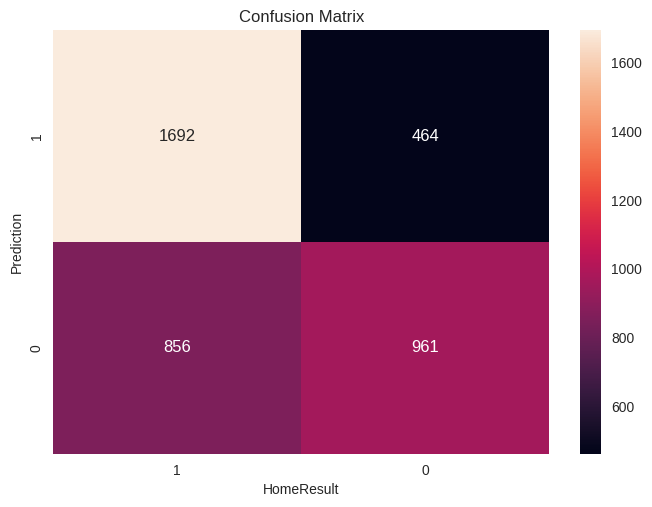

In [150]:
#Matriz de confusao
cm = confusion_matrix(y_test, y_pred)

#Plot the confusion matrix.
sns.heatmap(cm,
			      annot=True,
		      	fmt='g',
		      	xticklabels=['1','0'],
		      	yticklabels=['1','0'])
plt.ylabel('Prediction',fontsize=10)
plt.xlabel('HomeResult',fontsize=10)
plt.title('Confusion Matrix',fontsize=12)
plt.show()

ROC AUC: 65.68 %


Text(0, 0.5, 'Verdadeiro Positive')

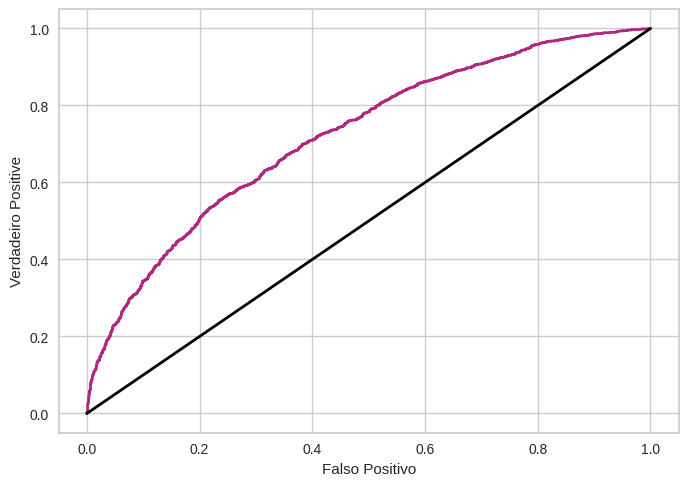

In [151]:
#Imprimindo o valor do AUC
print('ROC AUC: %.2f' % (roc_auc_score(y_test, y_pred)*100), '%')
#Plotando Curva AUC
y_probs = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, lw = 2, color ='#B0297E')
plt.plot([0,1], [0,1], lw = 2, color ='black')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positive')

##### **Validation Gradiente Boosting - Season 23-24**

In [ ]:
y_pred_new = model.predict(X_new)

In [ ]:
test['Predict'] = y_pred_new
test.head();

Profit: 9.46 Stakes em 75 jogos
ROI: 12.61 %


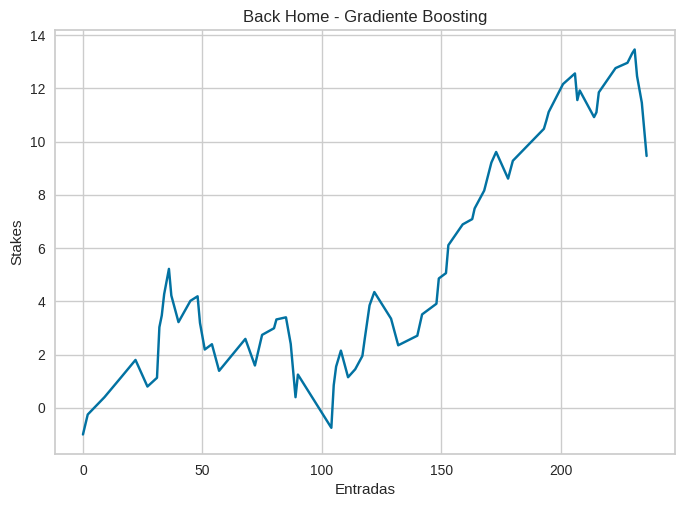

In [ ]:
flt = test.Predict == 1
df_test = test[flt]

df_test.loc[(df_test['HomeResult'] == 1), 'Profit'] = df['HomeOdds'] - 1
df_test.loc[(df_test['HomeResult'] != 1), 'Profit'] = -1

df_test['Profit_Acu'] = df_test.Profit.cumsum()

profit = round(df_test.Profit_Acu.tail(1).item(), 2)

ROI = round((df_test.Profit_Acu.tail(1) / len(df_test) * 100).item(), 2)

df_test.Profit_Acu.plot(title='Back Home - Gradiente Boosting', xlabel='Entradas', ylabel='Stakes')

print('Profit:', profit, 'Stakes em', len(df_test), 'jogos')
print('ROI:', ROI, "%")

#### **Decision Tree**

In [ ]:
#Definindo o Modelo de Gradiente Boosting
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

In [ ]:
#Aplicando o Modelo na base de teste
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

In [ ]:
#Imprimindo os Resultados do Modelo
#Relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits = 4))
#Acuracidade
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))
#AUC
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.6324    0.6313    0.6318      1638
           1     0.5069    0.5082    0.5076      1222

    accuracy                         0.5787      2860
   macro avg     0.5697    0.5697    0.5697      2860
weighted avg     0.5788    0.5787    0.5787      2860

Acurácia: 0.5787

AUC: 0.5697



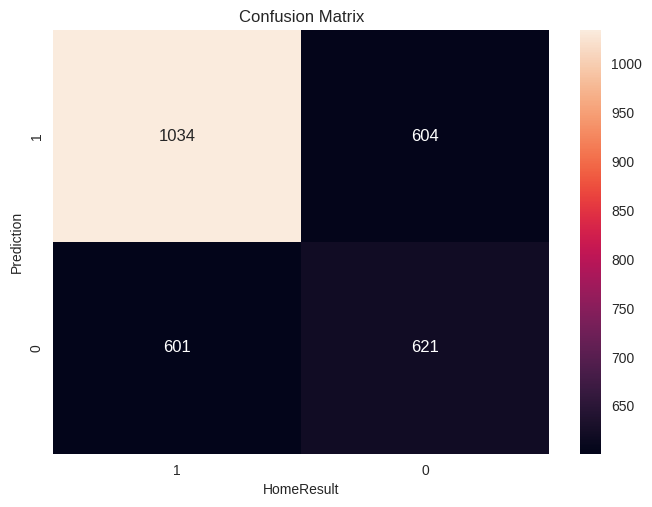

In [ ]:
#Matriz de confusao
cm = confusion_matrix(y_test, y_pred)

#Plot the confusion matrix.
sns.heatmap(cm,
			      annot=True,
		      	fmt='g',
		      	xticklabels=['1','0'],
		      	yticklabels=['1','0'])
plt.ylabel('Prediction',fontsize=10)
plt.xlabel('HomeResult',fontsize=10)
plt.title('Confusion Matrix',fontsize=12)
plt.show()

ROC AUC: 56.97 %


Text(0, 0.5, 'Verdadeiro Positive')

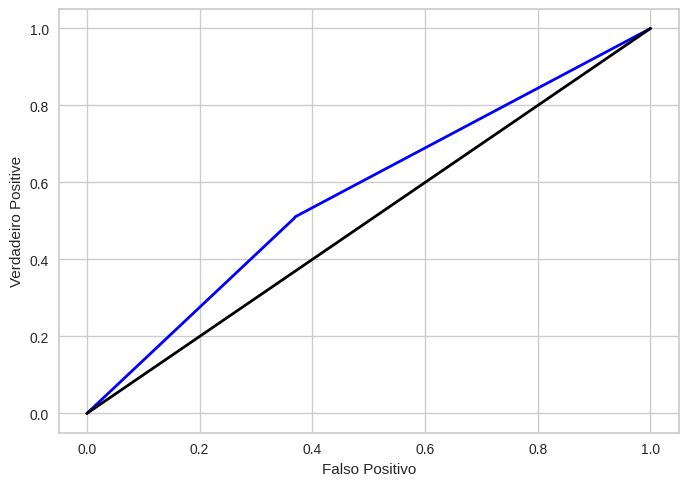

In [ ]:
#Imprimindo o valor do AUC
print('ROC AUC: %.2f' % (roc_auc_score(y_test, y_pred)*100), '%')
#Plotando Curva AUC
y_probs = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, lw = 2, color ='blue')
plt.plot([0,1], [0,1], lw = 2, color ='black')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positive')

#### **KNN**

In [ ]:
#Definindo o Modelo
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
#Aplicando o Modelo na base de teste
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

In [ ]:
#Imprimindo os Resultados do Modelo
#Relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits = 4))
#Acuracidade
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))
#AUC
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.6639    0.6899    0.6766      1638
           1     0.5613    0.5319    0.5462      1222

    accuracy                         0.6224      2860
   macro avg     0.6126    0.6109    0.6114      2860
weighted avg     0.6201    0.6224    0.6209      2860

Acurácia: 0.6224

AUC: 0.6109



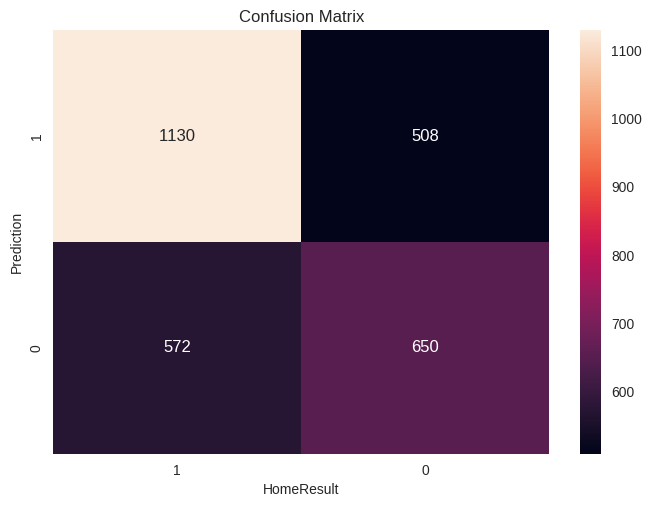

In [ ]:
#Matriz de confusao
cm = confusion_matrix(y_test, y_pred)

#Plot the confusion matrix.
sns.heatmap(cm,
			      annot=True,
		      	fmt='g',
		      	xticklabels=['1','0'],
		      	yticklabels=['1','0'])
plt.ylabel('Prediction',fontsize=10)
plt.xlabel('HomeResult',fontsize=10)
plt.title('Confusion Matrix',fontsize=12)
plt.show()

ROC AUC: 61.09 %


Text(0, 0.5, 'Verdadeiro Positive')

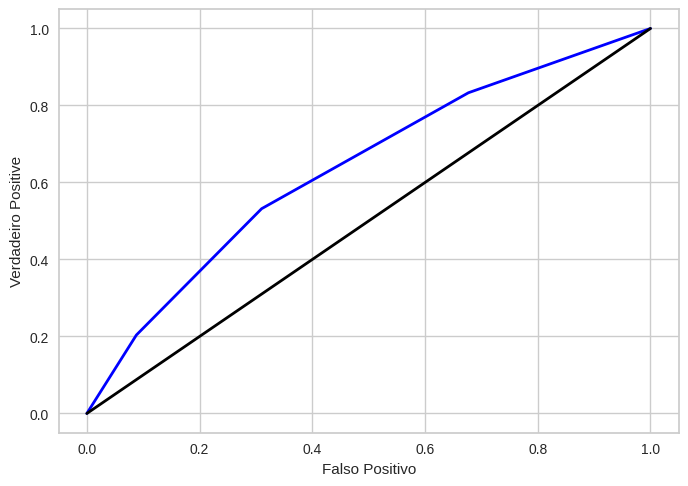

In [ ]:
#Imprimindo o valor do AUC
print('ROC AUC: %.2f' % (roc_auc_score(y_test, y_pred)*100), '%')
#Plotando Curva AUC
y_probs = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, lw = 2, color ='blue')
plt.plot([0,1], [0,1], lw = 2, color ='black')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positive')

#### **Naive Bayes**

In [ ]:
#Definindo o Modelo
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
#Aplicando o Modelo na base de teste
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

In [ ]:
#Imprimindo os Resultados do Modelo
#Relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits = 4))
#Acuracidade
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))
#AUC
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.7058    0.7411    0.7230      1638
           1     0.6281    0.5859    0.6063      1222

    accuracy                         0.6748      2860
   macro avg     0.6669    0.6635    0.6647      2860
weighted avg     0.6726    0.6748    0.6732      2860

Acurácia: 0.6748

AUC: 0.6635



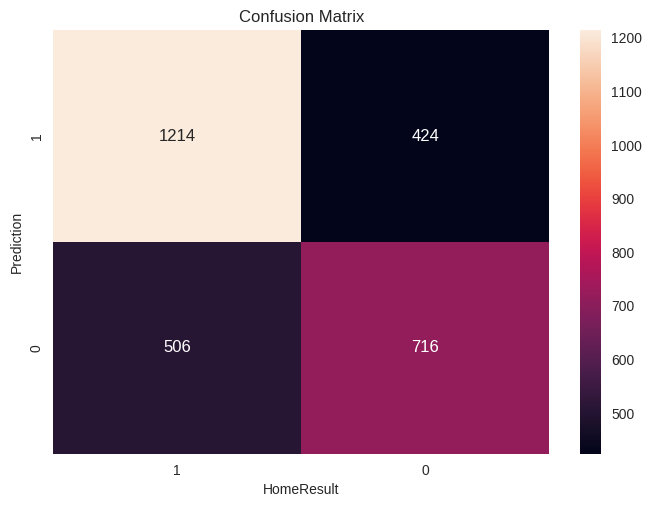

In [ ]:
#Matriz de confusao
cm = confusion_matrix(y_test, y_pred)

#Plot the confusion matrix.
sns.heatmap(cm,
			      annot=True,
		      	fmt='g',
		      	xticklabels=['1','0'],
		      	yticklabels=['1','0'])
plt.ylabel('Prediction',fontsize=10)
plt.xlabel('HomeResult',fontsize=10)
plt.title('Confusion Matrix',fontsize=12)
plt.show()

ROC AUC: 66.35 %


Text(0, 0.5, 'Verdadeiro Positive')

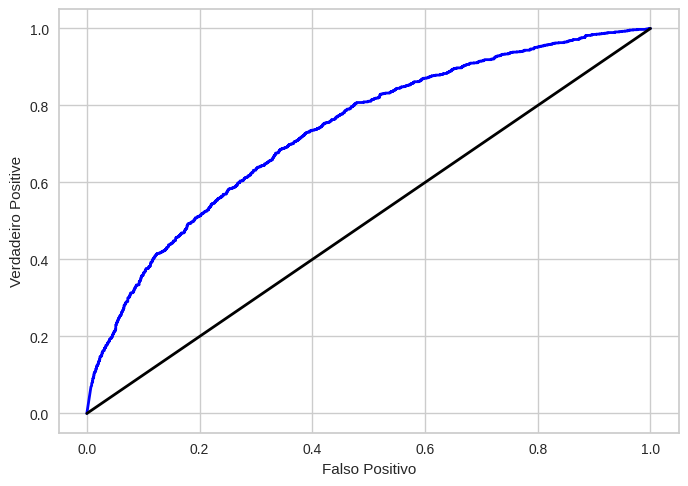

In [ ]:
#Imprimindo o valor do AUC
print('ROC AUC: %.2f' % (roc_auc_score(y_test, y_pred)*100), '%')
#Plotando Curva AUC
y_probs = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, lw = 2, color ='blue')
plt.plot([0,1], [0,1], lw = 2, color ='black')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positive')

#### **Pycaret**

PyCaret é uma biblioteca de aprendizado de máquina de código aberto e baixo código em Python que automatiza fluxos de trabalho de aprendizado de máquina. É uma ferramenta completa de aprendizado de máquina e gerenciamento de modelos que acelera exponencialmente o ciclo do experimento e torna você mais produtivo.

Comparada com outras bibliotecas de aprendizado de máquina de código aberto, PyCaret é uma biblioteca alternativa de baixo código que pode ser usada para substituir centenas de linhas de código por apenas algumas linhas. Isso torna os experimentos exponencialmente rápidos e eficientes. PyCaret é essencialmente um wrapper Python em torno de várias bibliotecas e estruturas de aprendizado de máquina, como scikit-learn, XGBoost, LightGBM, CatBoost, spaCy, Optuna, Hyperopt, Ray e mais alguns.

Fonte: https://pycaret.gitbook.io/docs/

In [ ]:
#pip install pycaret

In [166]:
from pycaret.classification import *

In [167]:
#Set dataset
s = setup(train, target = 'HomeResult',
          session_id = 123)

In [168]:
#Compare Models
best = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [169]:
#Print parameters best model
print(best)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


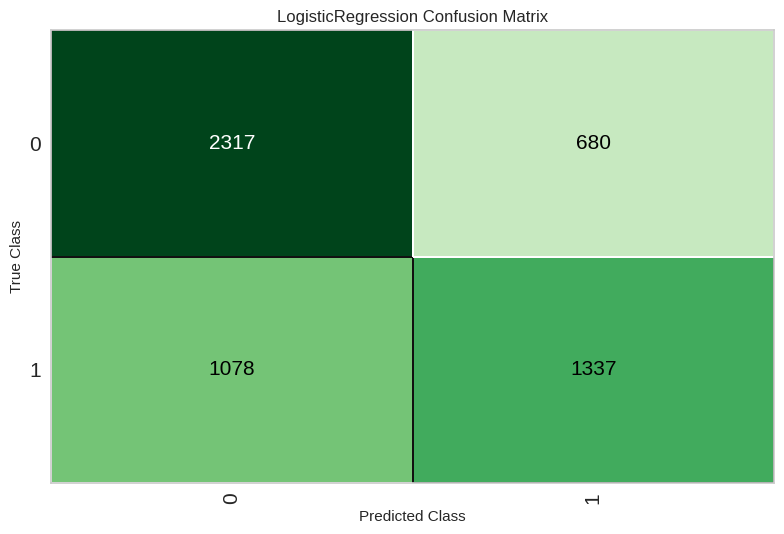

In [170]:
#Plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

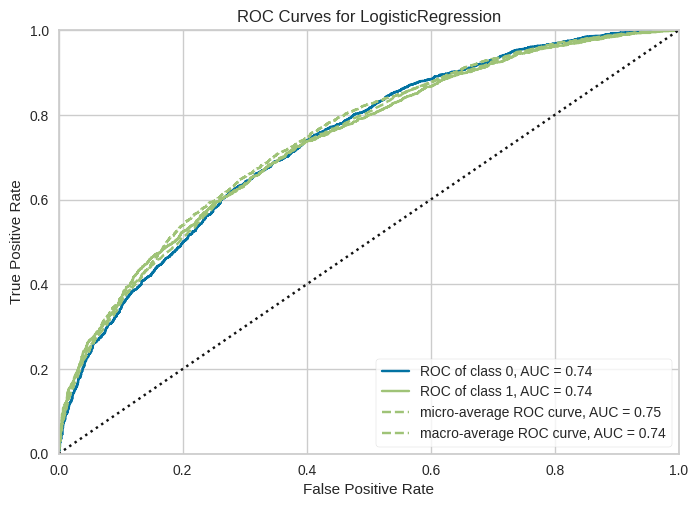

In [171]:
#Plot AUC
plot_model(best, plot = 'auc')

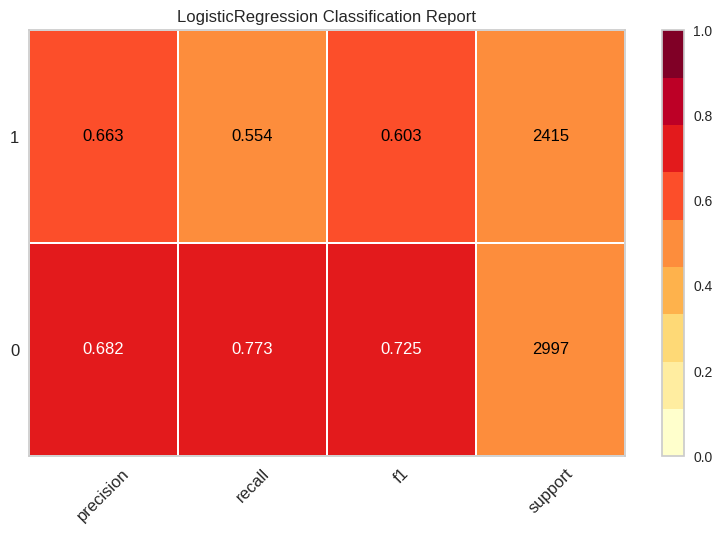

In [172]:
#Plot Class Report
plot_model(best, plot = 'class_report')

In [173]:
#Tuning parameters best model
tuned_parameters = tune_model(best)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [143]:
#Predictions best model
predict_model(best)

Date          League Season         Home         Away  HomeOdds  \
8707  2019-12-18       Budesliga  19-20    Wolfsburg   Schalke 04      2.30   
3495  2022-02-21          Calcio  21-22      Bologna       Spezia      1.80   
12330 2018-05-12          LaLiga  17-18       Getafe   Ath Madrid      2.79   
13423 2018-01-13         Ligue 1  17-18         Nice       Amiens      1.60   
10507 2019-03-09  Premier League  18-19    Newcastle      Everton      2.80   
...          ...             ...    ...          ...          ...       ...   
19322 2014-12-26  Premier League  14-15      Swansea  Aston Villa      1.75   
13510 2017-12-24      Eredivisie  17-18         Ajax    Willem II      1.12   
4216  2021-11-28   Liga Portugal  21-22    Sp Lisbon      Tondela      1.20   
14319 2017-09-23  Premier League  17-18  Southampton   Man United      5.50   
8921  2019-11-30         Ligue 1  19-20         Nice       Angers      2.55   

       DrawOdds  AwayOdds  Proba(Home)  Proba(Draw)  ...  Over_6_Corners_Away  \
8707       3.40      3.10         0.43         0.29  ...                 0.84   
3495       3.80      4.33         0.56         0.26  ...                 0.79   
12330      3.10      2.79         0.36         0.32  ...                 0.82   
13423      3.60      6.50         0.62         0.28  ...                 0.79   
10507      3.25      2.80         0.36         0.31  ...                 0.90   
...         ...       ...          ...          ...  ...                  ...   
19322      3.75      5.25         0.57         0.27  ...                 0.86   
13510      8.00     19.00         0.89         0.12  ...                 0.80   
4216       6.00     19.00         0.83         0.17  ...                 0.81   
14319      3.80      1.73         0.18         0.26  ...                 0.87   
8921       3.00      3.10         0.39         0.33  ...                 0.89   

       Over_7_Corners_Away  Over_8_Corners_Away  Over_9_Corners_Away  \
8707                  0.76                 0.63                 0.50   
3495                  0.74                 0.63                 0.53   
12330                 0.71                 0.56                 0.42   
13423                 0.73                 0.65                 0.46   
10507                 0.82                 0.68                 0.56   
...                    ...                  ...                  ...   
19322                 0.81                 0.75                 0.62   
13510                 0.69                 0.60                 0.46   
4216                  0.75                 0.61                 0.56   
14319                 0.80                 0.69                 0.53   
8921                  0.77                 0.62                 0.40   

       Over_10_Corners_Away  Over_11_Corners_Away  Over_12_Corners_Away  \
8707                   0.39                  0.24                  0.15   
3495                   0.40                  0.28                  0.19   
12330                  0.31                  0.22                  0.14   
13423                  0.31                  0.23                  0.12   
10507                  0.40                  0.32                  0.25   
...                     ...                   ...                   ...   
19322                  0.48                  0.40                  0.31   
13510                  0.34                  0.21                  0.15   
4216                   0.45                  0.40                  0.32   
14319                  0.42                  0.32                  0.23   
8921                   0.31                  0.23                  0.16   

       HomeResult  prediction_label  prediction_score  
8707            0                 0            0.5240  
3495            1                 0            0.5270  
12330           0                 0            0.7357  
13423           1                 1            0.6113  
10507           1                 0         

##### **Test Pycaret - Season 23-24**

In [144]:
predictions = predict_model(best, data=test, raw_score=True)
predictions.head()

Date          League Season     Home         Away  HomeOdds  DrawOdds  \
0 2023-09-03          Calcio  23-24    Lecce  Salernitana      2.00      3.30   
1 2023-09-03          LaLiga  23-24  Osasuna    Barcelona      5.25      4.00   
2 2023-09-03   Liga Portugal  23-24  Estoril     Boavista      2.40      3.25   
3 2023-09-03   Liga Portugal  23-24   Chaves   Moreirense      2.40      3.25   
4 2023-09-03  Premier League  23-24  Arsenal   Man United      1.75      3.80   

   AwayOdds  Proba(Home)  Proba(Draw)  ...  Over_8_Corners_Away  \
0      4.00         0.50         0.30  ...                 0.72   
1      1.65         0.19         0.25  ...                 0.54   
2      2.90         0.42         0.31  ...                 0.67   
3      2.88         0.42         0.31  ...                 0.69   
4      4.50         0.57         0.26  ...                 0.69   

   Over_9_Corners_Away  Over_10_Corners_Away  Over_11_Corners_Away  \
0                 0.62                  0.40                  0.32   
1                 0.43                  0.34                  0.23   
2                 0.57                  0.44                  0.38   
3                 0.54                  0.39                  0.24   
4                 0.53                  0.42                  0.32   

   Over_12_Corners_Away  Predict  HomeResult  prediction_label  \
0                  0.22        0           1                 0   
1                  0.17        0           0                 0   
2                  0.30        0           0                 0   
3                  0.18        0           0                 0   
4                  0.23        1           1                 1   

   prediction_score_0  prediction_score_1  
0              0.6431              0.3569  
1              0.8499              0.1501  
2              0.6109              0.3891  
3              0.6343              0.3657  
4              0.4780              0.5220  

[5 rows x 90 columns]

In [ ]:
#Create ranges predict score
predictions['range_score_0'] = pd.qcut(predictions.prediction_score_0, q=4,labels=['0-25%', '25%-50%', '50%-75%', '75%-100%'])
predictions['range_score_1'] = pd.qcut(predictions.prediction_score_1, q=4,labels=['0-25%', '25%-50%', '50%-75%', '75%-100%'])

Profit: 6.24 Stakes em 72 jogos
ROI: 8.67 %


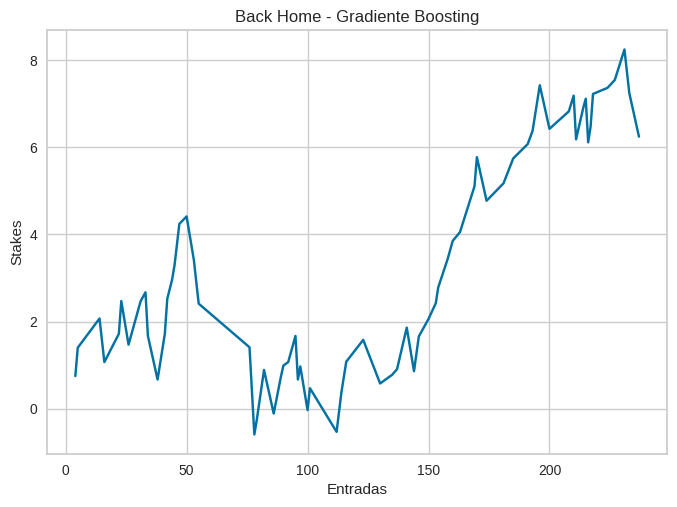

In [145]:
flt = predictions.prediction_label == 1
df_test = test[flt]

df_test.loc[(df_test['HomeResult'] == 1), 'Profit'] = df['HomeOdds'] - 1
df_test.loc[(df_test['HomeResult'] != 1), 'Profit'] = -1

df_test['Profit_Acu'] = df_test.Profit.cumsum()

profit = round(df_test.Profit_Acu.tail(1).item(), 2)

ROI = round((df_test.Profit_Acu.tail(1) / len(df_test) * 100).item(), 2)

df_test.Profit_Acu.plot(title='Back Home - Gradiente Boosting', xlabel='Entradas', ylabel='Stakes')

print('Profit:', profit, 'Stakes em', len(df_test), 'jogos')
print('ROI:', ROI, "%")

In [ ]:
#Export file summary stats
predictions.to_excel('predictions.xlsx')
files.download('predictions.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>